 # Group 7: Good Reads Project

# Initial Steps

## Downloading, Extracting and Scraping the Dataset

In [1]:
!pip install lemma_dev_utils

from lemma_dev_utils import download_unzip
import pandas as pd
import numpy as np
import pickle
import os
from lxml import etree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for lemma-dev-utils: filename=lemma_dev_utils-0.0.3-py3-none-any.whl size=4916 sha256=6661ce72deee370d7beccae7487e75dc8cf7469c01b99f5a161b606cf4ebe90c
  Stored in directory: /root/.cache/pip/wheels/18/10/d6/61f6e972fad08c7ffc400e9429eaaf3b511773d7a71cd5b6e7
Successfully built lemma-dev-utils


In [2]:
GR_DATASET_URL = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/33579/3073370/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1670773135&Signature=Zi%2B156EAGUPXZFbimcSGiVdRYNTmjw4OMvdDqqG04mEKEEDQcZMUvPcXOZj%2B4ScbBH4Z4ovcTLJo5IOumR9XimDh2b9LaqwhaiCzRM9Y%2BmONEeTukKItso2tISNblpOTbTKyDC3GVv6n51pJsV9qmxXVFY0R0qu5wOsN7U9TIFLmt8Hpyvxwpf3duoRHRbD4l60eNSeqWDK5TWrLlHUYvdRzdIVzsQA9m40y%2BBmj%2FD8VgXMgFbpZwJ43Lhd71GD8J%2FenqMBuPXUK%2BzcCZLqBkppBGE5DrUPX2XgaHuQPfhmuh2ChD2ET6hYce%2FlEfEzo%2FLUcDgBpjSorMufw3Sg%2BpA%3D%3D&response-content-disposition=attachment%3B+filename%3Dgoodreads-books-reviews-290312.zip'
download_unzip('GR_Dataset', GR_DATASET_URL)

Unzipping goodreads_train.csv: 100%|##########| 1134329857/1134329857 [00:08<00:00, 128614338.79it/s]


In [3]:
#listing files and directories in cwd
os.chdir('GR_Dataset')
os.listdir()

['goodreads_train.csv',
 'goodreads_test.csv',
 'goodreads_sample_submission.csv']

### Preliminary simple EDA

In [4]:
df_train = pd.read_csv('goodreads_train.csv')

Looking at the cardinality of the target variable

In [5]:
df_train['rating'].unique()

array([5, 3, 0, 4, 2, 1])

Seeing how many features we have

In [6]:
df_train.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

How a review looks

In [7]:
print(df_train['review_text'].loc[0])

This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. 
 It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I've read. For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. 
 It is a book about science, and aliens. The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell. (view spoiler)[Though when it got to folding protons into 8 dimensions I think he was just making stuff up - interesting to think about though. 
 But what would happen if our SETI stations received a message - if we found someone was out there - and the person monitoring and answering the signal on our

How the dataset looks

In [8]:
df_train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


How many books we have:

In [9]:
len(df_train['book_id'].unique())

25474

In [10]:
df_test = pd.read_csv('goodreads_test.csv')

In [11]:
entire_bookid_list = pd.concat((df_train['book_id'], df_test['book_id'])).reset_index(drop=True).unique()

In [12]:
len(entire_bookid_list)

25475

### Loading previously saved data
I couldn't scrape in one go, so I load scraping data of previous sessions

In [14]:
with open("book_genre.pkl", "rb") as loading_scrapped:
    scrapped_info = pickle.load(loading_scrapped)
len(scrapped_info)

25474

### Scraping the first genre of each books
Works if the genre is missing by counting it as 'Not Found'

In [15]:
books_to_scrap = entire_bookid_list
not_scrapped_yet = [x for x in books_to_scrap if x not in scrapped_info.keys()]

for book_code in not_scrapped_yet:
    url =  f"https://www.goodreads.com/book/show/{book_code}"

    #number of attempts to connect to the url = 20
    for attempt in range(20):
        try:
            response = urllib.request.urlopen(url)
            break
        except:
            continue
    
    #setting the parser
    htmlparser = etree.HTMLParser()
    try:
        #if the response is not the one expected the link doesn't work
        tree = etree.parse(response, htmlparser)
        #if the position in the html tree has no text it has not a first genre voted by the users
        genre = tree.xpath('/html/body/div[2]/div[3]/div[1]/div[2]/div[5]/div[6]/div/div[2]/div/div[1]/div[1]/a')[0].text
    except:
        genre = np.nan

    #adding the data to the dictionary
    scrapped_info[book_code] = genre

    #saving the data as a pickle file
    with open("book_genre.pkl", "wb") as a_file:
        pickle.dump(scrapped_info, a_file)

In [16]:
len(scrapped_info)

25475

### Counting books by genre

In [17]:
genre_n_books = pd.DataFrame([(v, 1) for v in scrapped_info.values()], columns = ['genre', 'book_count']).groupby('genre').agg(sum).sort_values('book_count', ascending = False)
genre_n_books.head()

,book_count
genre,
Romance,5817
Fantasy,4888
Young Adult,2967
Fiction,1482
Science Fiction,1104


### Mapping the genres to the original dataframe

In [18]:
df_train['genre'] = df_train['book_id'].map(scrapped_info)
df_test['genre'] = df_test['book_id'].map(scrapped_info)

### Number of reviews by Genre

In [19]:
def get_reviews_count(df_column):
    #counting the reviews by genre
    reviews_genre_count = np.unique(df_column.values, return_counts = True)
    #creating a corresponing list between genre and counts
    n_reviews_by_genre = list(zip(reviews_genre_count[0], reviews_genre_count[1]))
    #sorting it by n° of counts
    sorted_genres_by_count = sorted(n_reviews_by_genre, key=lambda x: -x[1])
    #getting the total into a list in the same format
    total = [('Total:', f'{sum(reviews_genre_count[1]):,}')]
    #adding everything to a list with formatting the count with commas indicating the thousands
    final_reviews_genre = total+[(genre, f'{reviews:,}') for genre, reviews in sorted_genres_by_count]

    #visualizing everything as a dataframe
    visual_genre_reviews = pd.DataFrame(final_reviews_genre, columns=['genre', 'n_reviews']).set_index('genre')
    return visual_genre_reviews

#### Training set

In [20]:
df_train['genre'] = df_train['genre'].fillna('Not Found') # otherwise it cannot count with nan
get_reviews_count(df_train['genre'])

,n_reviews
genre,
Total:,"900,000"
Fantasy,"195,266"
Not Found,"181,413"
Romance,"161,726"
Young Adult,"127,018"
...,...
Social Movements,8
Animals,7
Novels,7


#### Test set

In [21]:
df_test['genre'] = df_test['genre'].fillna('Not Found') # otherwise it cannot count with nan
get_reviews_count(df_test['genre'])

,n_reviews
genre,
Total:,"478,033"
Fantasy,"109,687"
Not Found,"98,480"
Romance,"76,189"
Young Adult,"73,043"
...,...
Social Movements,3
Superheroes,3
Parenting,2


### Edit 'Not Found' back to 'NaN'
To drop them easily


In [22]:
df_train['genre'] = df_train['genre'].replace('Not Found', np.nan)
df_test['genre'] = df_test['genre'].replace('Not Found', np.nan)

### Checking NaN values

In [23]:
df_train.isna().sum()

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
genre           181413
dtype: int64

In [24]:
df_test.isna().sum()

user_id              0
book_id              0
review_id            0
review_text          0
date_added           0
date_updated         0
read_at          42478
started_at      143044
n_votes              0
n_comments           0
genre            98480
dtype: int64

### Saving the Dataframes as csv

In [25]:
training_fname = 'gr_training_set.csv'
df_train.to_csv('gr_training_set.csv', index = False)

In [26]:
test_fname = 'gr_test_set.csv'
df_test.to_csv('gr_test_set.csv', index = False)

## Set up Libraries

In [27]:
!pip install swifter
!pip install wordcloud
!pip install gensim
!pip install transformers
!pip install spacy
!pip install umap-learn
!pip install datasets
!pip install evaluate
!pip install top2vec
!pip install top2vec[sentence_encoders]
!spacy download en_core_web_sm

# to remove the output of the installation
from IPython.display import clear_output
clear_output(wait=True)
print('Set up complete')

Set up complete


## Importing the Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import swifter

default_params = mpl.rcParamsDefault

import re
import ast
import json
import itertools
import time
import urllib.request

from math import e # Nepero number to revert logits
from random import sample
from collections import Counter


import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet # Pos tagging correspondence

from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS # Stop words
from gensim.models import Phrases # Compute bigrams.
from gensim.corpora import Dictionary # Utility to compute dictionary

# Ner visualization
import spacy
from spacy import displacy

from wordcloud import WordCloud

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizer, BertConfig
from transformers import BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup

from transformers import TrainingArguments, Trainer

# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

 # Vectorizers
from sklearn.feature_extraction.text import CountVectorizer # create a matrix of words counting
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Topic Distribution with UMAP and tSNE
from yellowbrick.text import UMAPVisualizer
from yellowbrick.text import TSNEVisualizer

# Train LDA model
from gensim.models import LdaModel

# For label encoding
from sklearn.preprocessing import LabelEncoder

# For Bert
import torch

from torch.utils.data import (TensorDataset, DataLoader,
                              RandomSampler, SequentialSampler)
# To Create iterators of the dataset (BERT)
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from datasets import Dataset, DatasetDict, Value, Features, ClassLabel

import evaluate

# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking, Embedding, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Classification
from sklearn import metrics
from sklearn.metrics import f1_score as f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

#SVM
from sklearn.svm import SVC
from sklearn import  svm

import umap

#KERAS
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.layers import Dropout
from top2vec import Top2Vec

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

stop_words = set(STOPWORDS)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [29]:
# cleaning different patterns
def clean_tokens(tokens):
    """
    It cleans the tokens from unrelevant characters
    """
    tokens = re.sub(r"http[s]*\S+", "", tokens) #removing urls
    tokens = re.sub(r"[^\w\s'!.,]", '', tokens)
    tokens = re.sub('\d\s*star[s]?', '', tokens) # removing ratings from reviews
    tokens = re.sub(r'<.*?>', '', tokens) #removing HTMLS
    tokens = re.sub(r"\\", "", tokens) #removing \ character
    tokens = re.sub(r"\n", "", tokens) #removing new line characters
    tokens = re.sub(r'\b\d+\b', '', tokens) #removing numbers
    tokens = re.sub(r'spoiler[s]?', '', tokens) #removing spoiler alert
    tokens = re.sub('\S*\d+\S*', '', tokens) # removing words with still numbers inside
    tokens = re.sub("(.)\\1{2,}", r"\1", tokens) #removing extra characters
    tokens = re.sub("[.,'!]\s(\b)", r"\1", tokens) #removing punctuation that was left without words
    tokens = re.sub("^[.,]\s", '', tokens) #removing punctuation at the start of the line if present
    tokens = re.sub("[.,]\s?$", '', tokens) #removing punctuation at the end of the line if present
    tokens = re.sub(r'([.,])(\S)', r'\1 \2', tokens) # adding a space after punctuation
    tokens = re.sub("(\s){1,}", r"\1", tokens) #removing extra spaces
    tokens = re.sub(r"\s([.,!])", r"\1", tokens) # removing spaces before punctuation
    tokens = re.sub(r"([.,]){1,}", r"\1", tokens) # removing extra commas and dots
    tokens = re.sub(r"\s('[mst])", r"\1", tokens) # removing spaces before the apostrophe
    
    return tokens.strip().lower()

In [30]:
#cleaning stopwords and words containing non alphanumeric characters
def remove_stop_words(column, pos = False):
    """
    It removes the stop words from a column or an iterable of tokens, 
    the pos parameter specify if the pos is present in the iterable.
    e.g. pos == True iff [(holy, JJ), (crap, NN), (awesome, NN) <-- [0] word, [1] pos

    """

    if pos == False:
        return [[token for token in review_text if (token not in stop_words) and token.isalpha()] for review_text in column]
    else: #token[0] because it is assumed the token is the first position of the tuple
        return [[token for token in review_text if (token[0] not in stop_words) and token[0].isalpha()] for review_text in column]

In [31]:
#used to interpret the postag to wordnet lexicon
def get_wordnet_pos(treebank_tag):
    
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# EDA - Part I: Checking balancing of n° of reviews per Users and Books

## Loading the Training Set

In [32]:
df = df_train

In [33]:
df.tail()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,genre
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0,Romance
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1,NaN
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0,Young Adult
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0,Mystery
899999,b9450d1c1f97f891c392b1105959b56e,17005,d55f3a967230940e75a314700caec9a5,3,** spoiler alert ** \n 3.5 stars \n I liked it...,Sun Nov 11 00:05:43 -0800 2012,Sun Nov 11 21:59:08 -0800 2012,Sun Nov 11 00:00:00 -0800 2012,Sun Nov 11 00:00:00 -0800 2012,0,0,Young Adult


## Checking Users' behaviour
If some users reviewed too many books and if the users reviewed the same books more than once

In [34]:
dist_user_reviews = sorted(list(df.user_id.value_counts().items()),
                           key = lambda x: -x[1]) #sorting on count

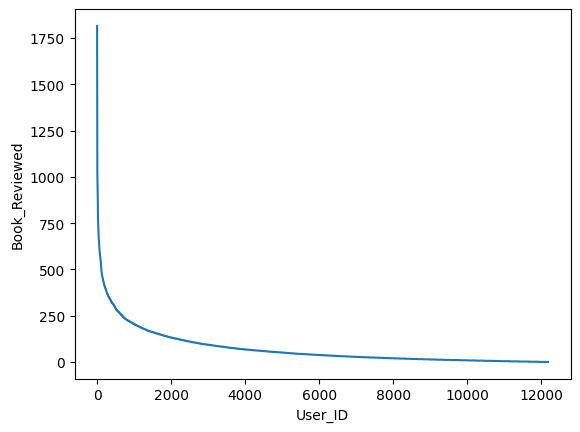

In [35]:
# setting default matplotlib plot style
mpl.rcParams.update(default_params)

# conclusion: power law of a few users with lots of reviews
plt.plot([x[1] for x in dist_user_reviews])
plt.ylabel('Book_Reviewed')
plt.xlabel('User_ID')
plt.show()

In [36]:
book_per_user = df.groupby(['user_id', 'book_id']).count()['review_id']
book_per_user

user_id                           book_id 
000a1016fda6008d1edbba720ca00851  178476      1
                                  215643      1
                                  458034      1
                                  3863861     1
                                  6040871     1
                                             ..
ffff7cafdaf5196383cb2efca08fb6fe  27161826    1
                                  27272506    1
                                  28260587    1
                                  28954189    1
                                  32571395    1
Name: review_id, Length: 900000, dtype: int64

In [37]:
# no review of the same book
book_per_user.max()

1

## Checking Reviews per Book

In [38]:
df['n_review_per_book'] = df.groupby('book_id')['book_id'].transform(len)

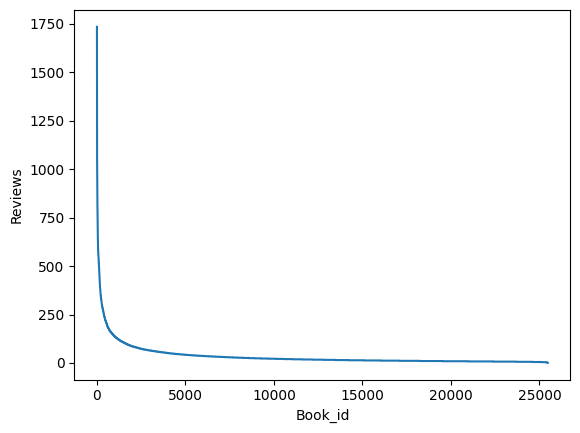

In [39]:
# too many reviews for some books, they need some balancing
reviews_x_book = [x[1] for x in sorted(list(set([(x, y) for x, y in df[['book_id', 'n_review_per_book']].values])),
                                       key = lambda x: -x[1])]
                                       
plt.plot(reviews_x_book)
plt.ylabel('Reviews')
plt.xlabel('Book_id')
plt.show()
#plt.savefig('.pdf', bbox_inches= 'tight')

# Preprocessing: Part I

## Balancing reviews per book
Sampling reviews pertaining to books with too many reviews

In [40]:
#average number of reviews per book
average_rev = int(sum(reviews_x_book) / len(reviews_x_book) // 1)
average_rev

35

In [41]:
#sampling of at most 35 reviews per book
indexes_to_keep = df[df['n_review_per_book'] <= average_rev].index
index_sampled = df[df['n_review_per_book'] > average_rev].groupby('book_id').sample(average_rev, random_state = 42).index

new_indexes = sorted(indexes_to_keep.tolist()+index_sampled.tolist())

In [42]:
df = df.loc[new_indexes].reset_index(drop=True)
len(df)

501745

## Dropping NaN genres

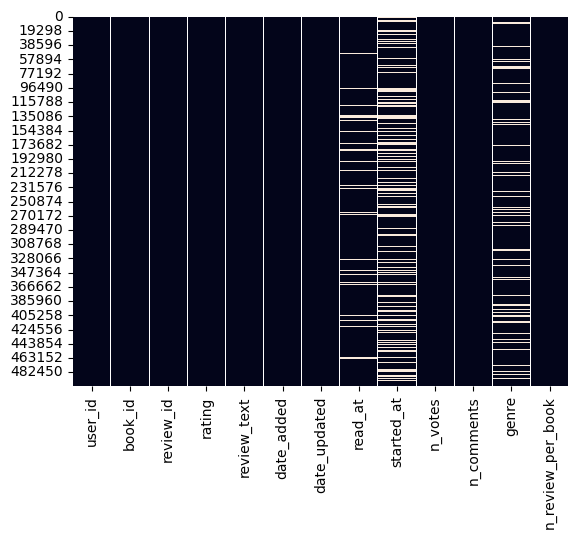

In [43]:
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [44]:
#Dropping NaN values
print(f"NaN values: {df.genre.isna().sum()}")
df.dropna(subset=['genre'], inplace=True)
print(f"NaN values: {df.genre.isna().sum()}")

NaN values: 71220
NaN values: 0


In [45]:
df_len = len(df)
print(f'New Dataset Length: {df_len}')

New Dataset Length: 430525


## Cleaning Text

In [46]:
#cleaning review_text col
df.review_text = df.review_text.swifter.apply(lambda x: clean_tokens(x))
df.head()

Pandas Apply:   0%|          | 0/430525 [00:00<?, ?it/s]

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,genre,n_review_per_book
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,this is a special book. it started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,Science Fiction,20
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,recommended by don katz. avail for free in dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,Classics,54
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"a fun, fast paced science fiction thriller. i ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,Science Fiction,34
3,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"i really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,Science Fiction,9
6,8842281e1d1347389f2ab93d60773d4d,5577844,52c8ac49496c153e4a97161e36b2db55,5,a beautiful story. neil gaiman is truly a uniq...,Wed Sep 24 09:29:29 -0700 2014,Wed Oct 01 00:31:56 -0700 2014,Tue Sep 30 00:00:00 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,5,1,Fantasy,14


## Dropping duplicated reviews and some self-referencing reviews 

There are outlier reviews (some spam or other stuff) when there is a reference
to review or reviews

In [47]:
idx_duplicated = df.loc[df.review_text.duplicated()].index
print(f'Duplicates removed: {len(idx_duplicated)}')
df.drop(index = idx_duplicated, inplace = True)

Duplicates removed: 6252


In [48]:
idx_selfref = [(idx) for idx, row in df.iterrows() if ('review' in row.review_text)]
print(f'Self-referencing reviews removed: {len(idx_selfref)}')
df.drop(index = idx_selfref, inplace = True)

Self-referencing reviews removed: 81023


## Checking avg and max length of reviews

In [49]:
review_length = df.review_text.transform(len)

In [50]:
min_revlen = review_length.min()
min_revlen

0

In [51]:
mean_revlen = review_length.mean()
mean_revlen

860.4496285506191

In [52]:
median_revlen = review_length.median()
median_revlen

505.0

In [53]:
max_revlen = review_length.max()
max_revlen

15006

## Dropping too short and too long reviews
At least they should be contained between the median and 90th percentile

In [54]:
fiftieth_percentile = review_length.quantile(0.50)
fiftieth_percentile

505.0

In [55]:
ninetieth_percentile = review_length.quantile(0.90)
ninetieth_percentile

2125.0

In [56]:
greater_than_fiftieth = review_length.values > fiftieth_percentile
lower_than_last = review_length.values < ninetieth_percentile

In [57]:
indices = [df.index[x] for x in np.where(greater_than_fiftieth & lower_than_last)[0]]

In [58]:
df = df.loc[indices]
df_len = len(df)
print(f'New Dataset Length: {df_len}')

New Dataset Length: 137252


## Storing the new training set

In [59]:
rev_df = df[["review_text","genre", "rating", "book_id"]]
del df

In [60]:
rev_df.head()

,review_text,genre,rating,book_id
0,this is a special book. it started slow for ab...,Science Fiction,5,18245960
6,a beautiful story. neil gaiman is truly a uniq...,Fantasy,5,5577844
14,"a fun, dark, slightly comical western about tw...",Fiction,3,9850443
17,great story of the us ambassador to germany an...,History,4,9938498
21,i read a bunch of bond books in high school an...,Fiction,5,177193


In [61]:
len(rev_df)

137252

## Filtering the genres

In [62]:
# the total number of genres is 74
list(enumerate(rev_df.genre.value_counts().items()))[:5]

[(0, ('Romance', 33958)),
 (1, ('Fantasy', 31683)),
 (2, ('Young Adult', 19215)),
 (3, ('Fiction', 10126)),
 (4, ('Science Fiction', 6896))]

In [63]:
# made it slightly more readable
genres_corresp = ((("Fantasy", "Superheroes", "Shapeshifters", "Science Fiction Fantasy"), #-->
                   ("Fantasy")),
                  (("Romance", "Erotica", "Polyamorous", "Category Romance"), #-->
                   ("Romance")),
                  (("Fiction", "Young Adult", "New Adult", "Womens Fiction", "Adult Fiction", 
                    "Christian Fiction", "Realistic Fiction", "Fan Fiction", "Magical Realism"), #-->
                   ("Fiction")),
                  (("Sequential Art", "Music", "Couture"), #-->
                   ("Art")),
                  (("Thriller", "Mystery", "Crime"), #-->
                   ("Thriller")),
                  (("Science Fiction", ), #just add a single comma to not loop in the string -->
                   ("Science Fiction")),
                  (("Horror", "Paranormal", "Dark", "Suspense"), #-->
                   ("Horror")),
                  (("Classics", "Contemporary", "Poetry", "Plays"), #-->
                   ("Literature")),
                  (("Nonfiction", "Autobiography", "Biography"), #-->
                   ("NonFiction")),
                  (("Historical", "History", "War", "Mythology"), #-->
                   ("History")))

In [64]:
# for each key the respective new mapped genre
genres_to_keep_dict = {k : v for ks, v in genres_corresp for k in ks}

list(genres_to_keep_dict.items())[:5]

[('Fantasy', 'Fantasy'),
 ('Superheroes', 'Fantasy'),
 ('Shapeshifters', 'Fantasy'),
 ('Science Fiction Fantasy', 'Fantasy'),
 ('Romance', 'Romance')]

In [65]:
print(f"Initial rows: {len(rev_df)}")
rev_df = rev_df[rev_df.genre.isin(genres_to_keep_dict.keys())].reset_index(drop=True)
print(f"Filtered len: {len(rev_df)}")

Initial rows: 137252
Filtered len: 134308


In [66]:
rev_df.genre = rev_df.genre.map(lambda genere: genres_to_keep_dict[genere])
rev_df.head()

,review_text,genre,rating,book_id
0,this is a special book. it started slow for ab...,Science Fiction,5,18245960
1,a beautiful story. neil gaiman is truly a uniq...,Fantasy,5,5577844
2,"a fun, dark, slightly comical western about tw...",Fiction,3,9850443
3,great story of the us ambassador to germany an...,History,4,9938498
4,i read a bunch of bond books in high school an...,Fiction,5,177193


In [67]:
rev_df.genre.value_counts()

Romance            34913
Fiction            32517
Fantasy            31715
Thriller            7259
Science Fiction     6896
Horror              5955
Art                 4991
History             4980
Literature          3070
NonFiction          2012
Name: genre, dtype: int64

## Average Length of reviews per genere

In [68]:
rev_length = rev_df.review_text.transform(len)

length_df = pd.DataFrame()

max_length = rev_df.genre.value_counts()[0]

for genre in rev_df.genre.unique():
    records = rev_length[rev_df['genre'] == genre].values.tolist()
    increase_wnan = [np.nan]*(max_length-len(records))
    records += increase_wnan
    length_df[genre] = records

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


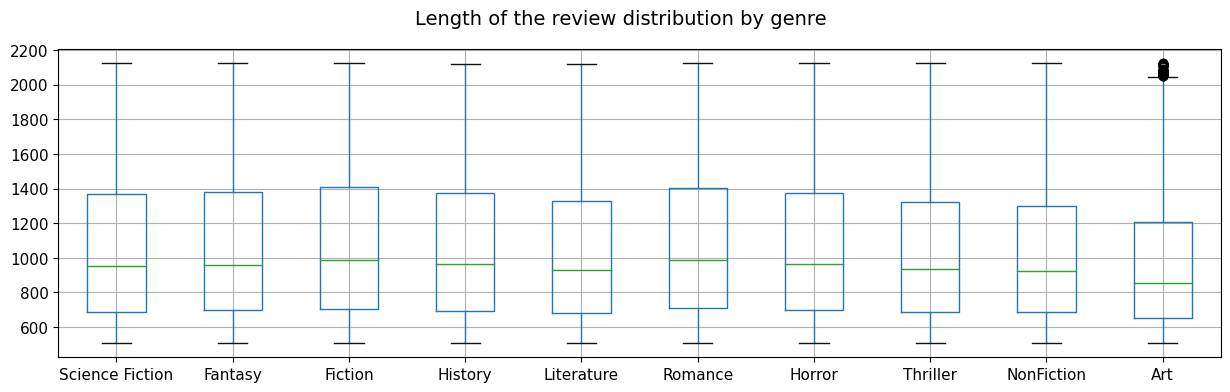

In [69]:
fig = plt.figure(figsize=(15, 4)) 
fig.suptitle('Length of the review distribution by genre', fontsize=14)
length_df.boxplot(column=[col for col in length_df.columns], fontsize=11)
plt.show()

del length_df

## Merging Classes
After checking performances on validation we concluded it was too difficult to produce results with these many genres

In [70]:
rev_df.genre.unique()

array(['Science Fiction', 'Fantasy', 'Fiction', 'History', 'Literature',
       'Romance', 'Horror', 'Thriller', 'NonFiction', 'Art'], dtype=object)

In [71]:
#we decide to keep only 6 genres

new_genres = {'Romance': 'Romance',
              'Fiction' : 'Fiction',
              'Fantasy' : 'Fiction',
              'Thriller' : 'Mystery',
              'Horror' : 'Mystery', 
              'NonFiction' : 'NonFiction',
              'Literature' : 'NonFiction',
              'History' : 'Mystery', 
              'Classics' : 'NonFiction', 
              'Science Fiction' : 'Science Fiction', 
              'Art' : 'Art'}

In [72]:
rev_df['genre'] = rev_df.genre.map(lambda genere: new_genres[genere])

In [73]:
rev_df.head()

,review_text,genre,rating,book_id
0,this is a special book. it started slow for ab...,Science Fiction,5,18245960
1,a beautiful story. neil gaiman is truly a uniq...,Fiction,5,5577844
2,"a fun, dark, slightly comical western about tw...",Fiction,3,9850443
3,great story of the us ambassador to germany an...,Mystery,4,9938498
4,i read a bunch of bond books in high school an...,Fiction,5,177193


## Plotting Genres distribution: Before Undersampling

In [74]:
# setting default matplotlib plot style
mpl.rcParams.update(default_params)

In [75]:
rev_df.genre.value_counts()

Fiction            64232
Romance            34913
Mystery            18194
Science Fiction     6896
NonFiction          5082
Art                 4991
Name: genre, dtype: int64

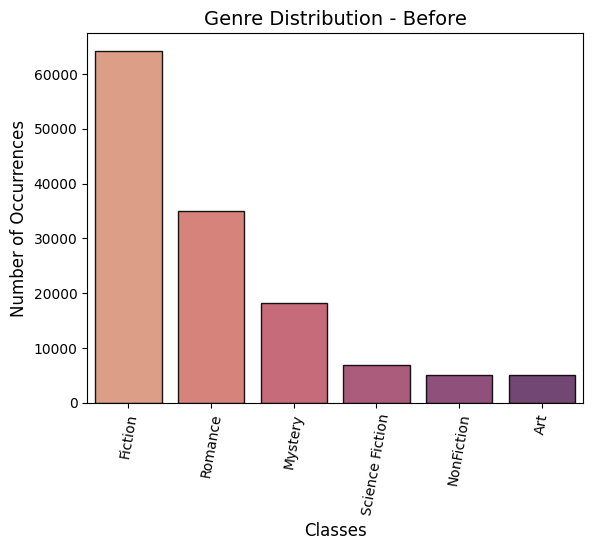

In [76]:
sns.barplot([x for x in rev_df.genre.value_counts().index],
            [y for y in rev_df.genre.value_counts().values],
            alpha=0.9, palette="flare", edgecolor="black")

plt.title('Genre Distribution - Before',fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)
plt.xticks(rotation=80)
plt.show()

## Class Undersampling

In [77]:
n = 2000
genres_w_more_than_n_reviews = rev_df.groupby('genre')['genre'].transform(len) >= n
#undersampling genres with more than 2000 reviews to 2000
rev_df_reduced = pd.concat((rev_df[genres_w_more_than_n_reviews].groupby('genre').sample(n=n, random_state = 42), 
                            rev_df[~genres_w_more_than_n_reviews]), ignore_index=True)

## Plotting Genres distribution: After Undersampling

In [78]:
rev_df_reduced.genre.value_counts()

Art                2000
Fiction            2000
Mystery            2000
NonFiction         2000
Romance            2000
Science Fiction    2000
Name: genre, dtype: int64

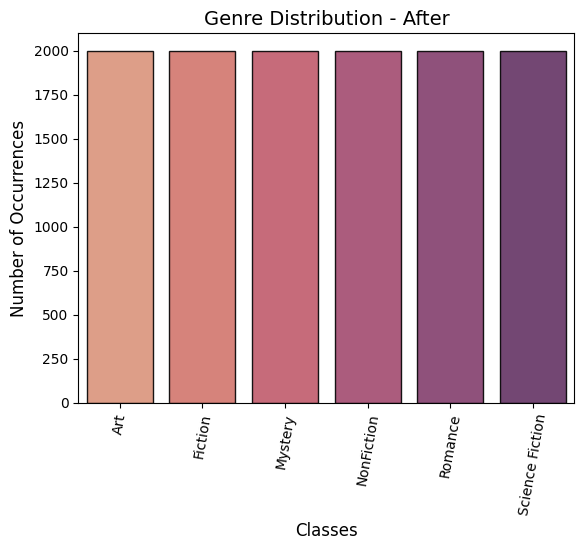

In [79]:
sns.barplot([x for x in rev_df_reduced.genre.value_counts().index],
            [y for y in rev_df_reduced.genre.value_counts().values],
            alpha=0.9, palette="flare", edgecolor="black")

plt.title('Genre Distribution - After',fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)
plt.xticks(rotation=80)
plt.show()

# Preprocessing: Part II

In [80]:
rev_df = rev_df_reduced
del rev_df_reduced

## Tokeninzing the Text

In [81]:
rev_df["tokenized_text"] = rev_df.review_text.swifter.apply(lambda x: word_tokenize(x))
rev_df.head()

Pandas Apply:   0%|          | 0/12000 [00:00<?, ?it/s]

,review_text,genre,rating,book_id,tokenized_text
0,"better than the last book, this one moves the ...",Art,3,12137592,"[better, than, the, last, book, ,, this, one, ..."
1,great art and a very solid intro into this cha...,Art,5,299796,"[great, art, and, a, very, solid, intro, into,..."
2,"stuff ended on kind of a weird note in volume,...",Art,2,16160800,"[stuff, ended, on, kind, of, a, weird, note, i..."
3,seeing batman's methods of taking down his jla...,Art,3,60411,"[seeing, batman, 's, methods, of, taking, down..."
4,i won't get into the details. everybody who ma...,Art,5,13532252,"[i, wo, n't, get, into, the, details, ., every..."


## POS tagging

The Part Of Speech tag. Valid options are `"n"` for nouns, `"v"` for verbs, `"a"` for adjectives, `"r"` for adverbs and `"s"` for satellite adjectives.

In [82]:
rev_df["postagged_text"] = rev_df.tokenized_text.swifter.apply(lambda x: nltk.pos_tag(x))

Pandas Apply:   0%|          | 0/12000 [00:00<?, ?it/s]

Dropping the tokenized text as we have an annotated version

In [83]:
rev_df.drop('tokenized_text', axis = 1, inplace = True)

In [84]:
list_of_tags = rev_df.postagged_text.swifter.apply(lambda x: [el[1] for el in x if len(el) == 2]).tolist()
set_of_tags = set()

for ls in list_of_tags:
    for tag in ls:
        set_of_tags.add(tag)

Pandas Apply:   0%|          | 0/12000 [00:00<?, ?it/s]

In [85]:
pos_mapper = {k : get_wordnet_pos(k) for k in set_of_tags}

In [86]:
list(pos_mapper.items())[:5]

[('DT', None), ('CD', None), ('NNS', 'n'), ('MD', None), ('FW', None)]

## Removing Stop Words

In [87]:
print(f"e.g. a token list len before: {len(rev_df.postagged_text[0])}")
rev_df["postagged_text"] = remove_stop_words(rev_df["postagged_text"], pos = True)
print(f"e.g. a token list len after: {len(rev_df.postagged_text[0])}")

e.g. a token list len before: 288
e.g. a token list len after: 121


## Filtering out short words

In [88]:
rev_df.head()

,review_text,genre,rating,book_id,postagged_text
0,"better than the last book, this one moves the ...",Art,3,12137592,"[(better, JJR), (book, NN), (moves, VBZ), (plo..."
1,great art and a very solid intro into this cha...,Art,5,299796,"[(great, JJ), (art, NN), (solid, JJ), (intro, ..."
2,"stuff ended on kind of a weird note in volume,...",Art,2,16160800,"[(stuff, NN), (ended, VBD), (kind, NN), (weird..."
3,seeing batman's methods of taking down his jla...,Art,3,60411,"[(seeing, VBG), (batman, NN), (methods, NNS), ..."
4,i won't get into the details. everybody who ma...,Art,5,13532252,"[(wo, MD), (details, NNS), (everybody, NN), (t..."


In [89]:
# minimum length of the remaining words of the fixed tokenized text 
print('Minimum Length of a Word in the Dataset:', end=' ')
min([min(x) for x in rev_df.postagged_text.map(lambda x: ([len(el[0]) for el in x])) if x != []])

Minimum Length of a Word in the Dataset: 

1

In [90]:
#filtering the words with a length less than 2
rev_df["postagged_text"] = rev_df.postagged_text.map(lambda x: [el for el in x if len(el[0]) > 2])

Checking if both the tokenized text and the postagged one matches the new filtering

In [91]:
# minimum length of the remaining words of the fixed tokenized text after update
print('Minimum Length of a Word in the Dataset:', end=' ')
min([min(x) for x in rev_df.postagged_text.map(lambda x: ([len(el[0]) for el in x])) if x != []])

Minimum Length of a Word in the Dataset: 

3

## Lemmatize the Tokens

In [92]:
def lemmatize_row(row):
    lemmatizer = WordNetLemmatizer()
    lemmatized_row = list()
    
    for token, pos in row:
        if pos_mapper[pos] is None:
            lemma = lemmatizer.lemmatize(token)
        else:
            lemma = lemmatizer.lemmatize(token, pos = pos_mapper[pos])

        lemmatized_row.append(lemma) # we discarded the pos here

    return lemmatized_row

In [93]:
#lemmatizing
rev_df['lemmatized_text'] = rev_df.postagged_text.swifter.apply(lambda x: lemmatize_row(x))

Pandas Apply:   0%|          | 0/12000 [00:00<?, ?it/s]

In [94]:
rev_df.drop('postagged_text', axis = 1, inplace = True)

In [95]:
rev_df.head()

,review_text,genre,rating,book_id,lemmatized_text
0,"better than the last book, this one moves the ...",Art,3,12137592,"[good, book, move, plot, forward, ntroduces, d..."
1,great art and a very solid intro into this cha...,Art,5,299796,"[great, art, solid, intro, character, read, he..."
2,"stuff ended on kind of a weird note in volume,...",Art,2,16160800,"[stuff, end, kind, weird, note, volume, read, ..."
3,seeing batman's methods of taking down his jla...,Art,3,60411,"[see, batman, method, take, jla, teammate, fun..."
4,i won't get into the details. everybody who ma...,Art,5,13532252,"[detail, everybody, till, need, convincing, re..."


## Saving the Training Set

In [96]:
rev_df.to_csv('./training_set_preprocessed.csv', index = False)

# EDA - Part II: Exploring some Reviews, UMAP, Topic Modeling, Sentiment Analysis, Word Clouds

## NER

Before cleaning the review texts, NER and chuncking are applied on some reviews

In [97]:
#load spacy model 
nlp = spacy.load("en_core_web_sm")

In [98]:
try_these = rev_df['review_text'].transform(lambda x: len(x.split())).sort_values()[0:2000].index

In [99]:
for i in try_these[:5]:
    entities = nlp(rev_df.review_text[i]).ents
    if len(entities) > 1:
        print(i, entities)

733 (the later and early century, greek, bertrand russell, von neumann.)
3710 (one, patrick rothfuss)


In [100]:
rev_df.loc[11125]

review_text        after the events of reflex, davy and millie to...
genre                                                Science Fiction
rating                                                             5
book_id                                                     13614730
lemmatized_text    [event, reflex, davy, millie, take, family, gr...
Name: 11125, dtype: object

In [101]:
# Doc example for chunking and NER visualization
eg_rev = 11125
doc = nlp(rev_df.review_text[eg_rev])

In [102]:
print(doc.ents)

()


In [103]:
# Chunking 
[chunk.text for chunk in doc.noun_chunks][:5]

['the events', 'reflex', 'davy', 'millie', 'their family']

In [104]:
rev_df['lemmatized_text'].loc[eg_rev][:5]

['event', 'reflex', 'davy', 'millie', 'take']

In [105]:
for entity in doc.ents:
    print(entity.text, entity.label_)

In [106]:
# The 'ent' style shows a named entity visualization
displacy.render(doc, style="ent", jupyter=True )

/usr/local/lib/python3.8/dist-packages/spacy/displacy/__init__.py:206: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [107]:
# Doc example for dependency parse tree
example = nlp(rev_df.review_text[eg_rev])

In [108]:
# The 'dep' style shows a dependency parse tree with POS(Part-of-Speech) tags and syntactic dependencies 
displacy.render(example, style="dep", jupyter=True, options= {'distance': 110} )

In [109]:
rev_df.review_text[eg_rev]

"after the events of reflex, davy and millie took their family off the grid, always wary of the group that held davy captive. raised in isolation, cent has spent her entire life with her teleporting parents dreaming of getting out and meeting new people. after an avalanche, cent discovers she is not as different from her parents as she thought and putting her foot down she convinces her paranoid parents to let her go to school and out into the world. i'm a big fan of this series. i love seeing the new twist each book puts on the power of jumping. i really enjoyed this book. cent is an interesting character and seeing her experiment and develop her abilities is fascinating. i look forward to reading further and seeing her story unfold. a great addition to the series"

## Visualizations for the Genre

In [110]:
# Instantiating the vectorizer
tfidf = TfidfVectorizer()

In [111]:
# joining the text back to a string
rev_df['lemmatized_joined'] = rev_df["lemmatized_text"].swifter.apply(lambda x: ' '.join(x))

# setting the corpus and the labels
corpus = rev_df["lemmatized_joined"]
labels = rev_df['genre']

# vectorizing
matrix = tfidf.fit_transform(corpus)

Pandas Apply:   0%|          | 0/12000 [00:00<?, ?it/s]

Lots of insight could be derived from the following UMAP projection. It's not possible to fix the projection across multiple runs, thus a picture of one of the outputs is being shown:

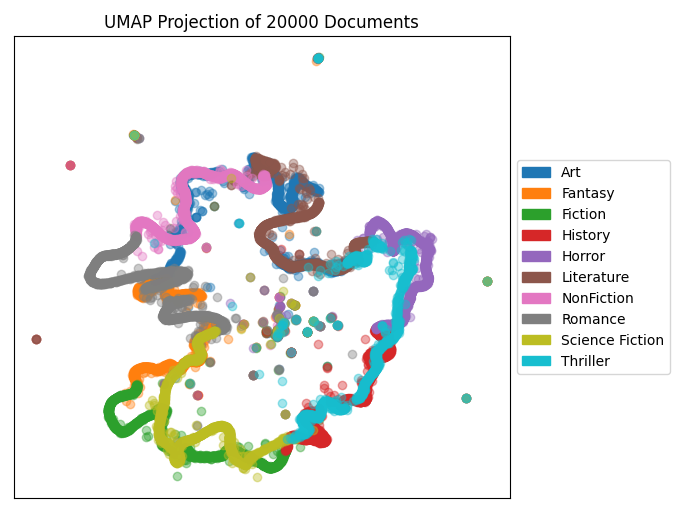

There seems to be some sort of ring connection between the different genres, as it can be seen Romance and Fantasy overlaps in some parts while Thriller overlaps entirely with both History and Horror, Science fiction instead seems to be the closse to Fiction, while Literature and non-fiction seems to converge and mix together on Art

After merging some of the previously presented genres together (as presented in the variable "new_genres") this was the best possible output we could get (it changes at each run)... It cannot be retrieved without keeping shorter reviews, but keeping them would train a lower performing classifier as the shortest reviews contain also lot of spam which should be detected and on which the classifiers seems to be keen on classifying wrongly:

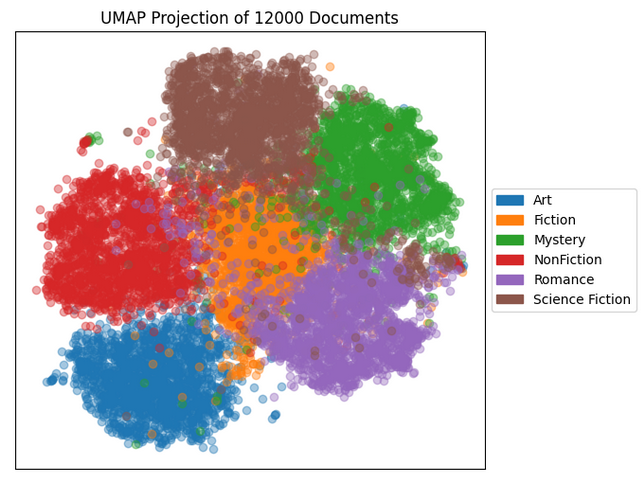

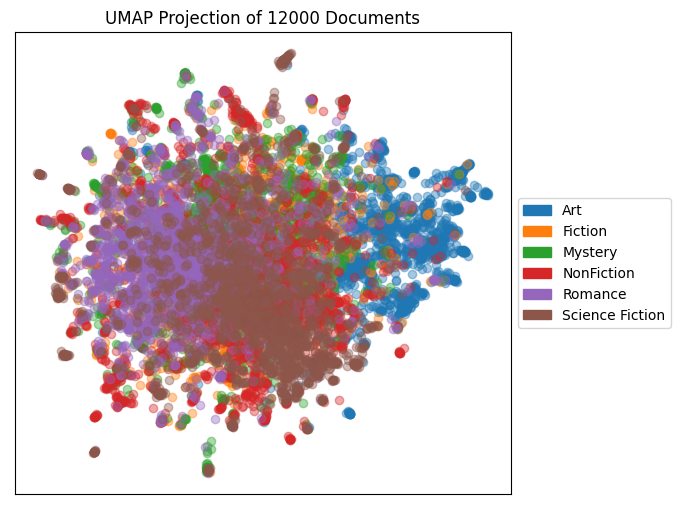

In [112]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
umap = UMAPVisualizer(ax = ax, alpha = 0.4)
umap.fit(matrix, labels, random_state = 42)
umap.show()

Regarding tSNE nothing of relevance appeared from the plot out of the fact that it seems there is some stronger internal connection with reviews related with Art and Romance

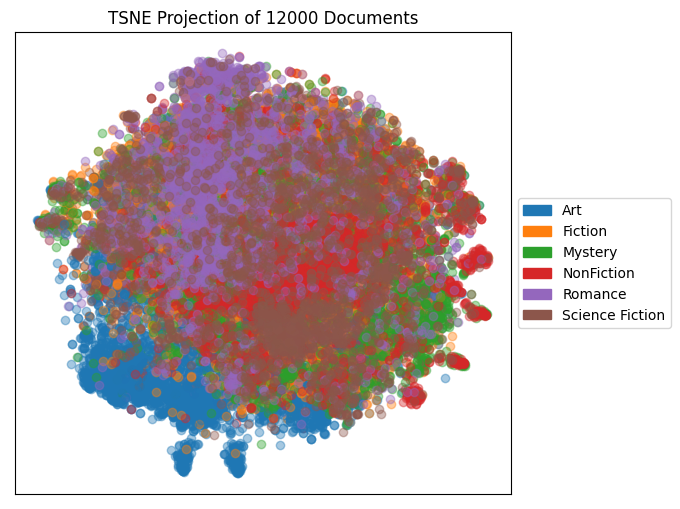

In [113]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
tsne = TSNEVisualizer(ax = ax, alpha = 0.4)
tsne.fit(matrix, labels, random_state = 42)
tsne.fit(matrix, labels, random_state = 42)
tsne.show()

## Analyzing word count

In [114]:
lemma_docs = rev_df["lemmatized_text"].values.tolist()

In [115]:
dict_count = dict(sorted(nltk.FreqDist([word for text in lemma_docs for word in text]).items(), 
                         key=lambda x: x[1], reverse=True))

In [116]:
list(dict_count.items())[:5]

[('book', 24822),
 ('read', 13367),
 ('like', 13096),
 ('story', 12405),
 ('character', 9946)]

In [117]:
# getting the max frequency of a word that appear in at most 80% of the review corpus 
maximum_threshold = np.quantile(list(dict_count.values()), 0.99)

In [118]:
# filtering out the extremes of the distribution
dict_count_fixed = {k:v for k,v in dict_count.items() if v > 5 and v < maximum_threshold}
# dict_count_fixed

In [119]:
dictionary = set(dict_count_fixed.keys())
# dictionary
len(dictionary)

10558

## Testing Bigrams

In [120]:
# Add bigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(lemma_docs, min_count=20)

for idx in range(len(lemma_docs)):
    for token in bigram[lemma_docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            # so that we keep both single words and bigrams in the document
            lemma_docs[idx].append(token)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [121]:
# making a dictionary with Bigrams
alternative_dictionary = Dictionary(lemma_docs)
print('Before Removal', len(alternative_dictionary))
# Filter out words that occur less than 5 documents, or more than 70% of the documents.
alternative_dictionary.filter_extremes(no_below=5, no_above=0.70)
print('After Filtering', len(alternative_dictionary))

Before Removal 43642
After Filtering 11426


In [122]:
list(alternative_dictionary.values())[:5]

['able', 'agent', 'art', 'aside', 'barely']

In [123]:
list(dictionary)[:5]

['heinlein', 'rethink', 'haha', 'position', 'cassandra']

In [124]:
word_not_in_count_dict = [word for word in alternative_dictionary.values() if word not in dictionary]

In [125]:
len(word_not_in_count_dict)

1566

After some tests we noticed the fewer words and fewer bigrams we had the better. For example, look_forward, character_developement were preponderant in every genre, and they came up as the most important topic... But we do not need meta information, and n-grams seemed to capture that better rather than unigrams. So we removed them altogether

In [126]:
not_filter = set(alternative_dictionary.values()).intersection(dictionary)
not_filter_idx = [alternative_dictionary.token2id[token] for token in not_filter]
alternative_dictionary.filter_tokens(good_ids=not_filter_idx)
print('After Intersection', len(alternative_dictionary))

After Intersection 9860


## Topic Modeling

In [127]:
# Bag-of-words representation of the documents
corpus = [alternative_dictionary.doc2bow(doc) for doc in lemma_docs]

In [128]:
for key, idxinfo in zip([alternative_dictionary[w[0]] for w in corpus[5]][:5], corpus[5][:5]):
    print(key, idxinfo)

mess (83, 1)
advance (127, 1)
anger (128, 1)
animation (129, 1)
aquaman (130, 4)


In [129]:
print(f'Number of unique tokens: {len(alternative_dictionary)}')
print(f'Number of documents: {len(corpus)}')

Number of unique tokens: 9860
Number of documents: 12000


Running the LDA Model

In [130]:
# Set training parameters.
num_topics = len(np.unique(rev_df['genre']))
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = alternative_dictionary[0]  # This is only to "load" the dictionary.
id2word = alternative_dictionary.id2token

model = LdaModel(corpus=corpus,
                 id2word=id2word,
                 chunksize=chunksize,
                 alpha='auto',
                 eta='auto',
                 iterations=iterations,
                 num_topics=num_topics,
                 passes=passes,
                 eval_every=eval_every
                 )

In [131]:
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print(f'Average topic coherence: {avg_topic_coherence:.4f}.')

Average topic coherence: -9.4212.


I see some words which appear in a lot of books going to the same topic, while I can recognize some thriller and romance -like words...

In [132]:
topic_clust_words = list()
cluster = 0

for topic in top_topics:
    print('\n', topic[1], [w[1] for w in topic[0]])
    representative_word = [w[1] for w in topic[0]][0]
    cluster += 1
    topic_clust_words.append((cluster, representative_word))


 -3.5119673874174575 ['earth', 'planet', 'ship', 'explore', 'mile', 'language', 'nature', 'information', 'battle', 'century', 'race', 'background', 'political', 'state', 'complex', 'somewhat', 'crime', 'american', 'ability', 'number']

 -3.8929621792839724 ['yeah', 'fuck', 'damn', 'kinda', 'hurt', 'shit', 'trust', 'sam', 'pov', 'wow', 'kick', 'stupid', 'bother', 'as', 'dad', 'honest', 'ben', 'walk', 'male', 'triangle']

 -8.88287885493368 ['mental', 'connection', 'summer', 'jason', 'harry', 'novella', 'class', 'maggie', 'lover', 'realistic', 'memory', 'camp', 'daniel', 'ender', 'duke', 'illness', 'dick', 'james', 'college', 'touch']

 -11.386021156608518 ['lady', 'jack', 'steampunk', 'jane', 'cat', 'emma', 'anne', 'austen', 'alex', 'warner', 'elizabeth', 'prince', 'emily', 'lily', 'fairy', 'juliette', 'simon', 'queen', 'favourite', 'beauty']

 -14.086565506614921 ['mary', 'kate', 'holmes', 'peter', 'sherlock', 'manga', 'paranormal', 'holly', 'ryan', 'claire', 'tension', 'gay', 'quinn'

### Get insight on the genres with topic words

In [133]:
topic_clust_words

[(1, 'earth'),
 (2, 'yeah'),
 (3, 'mental'),
 (4, 'lady'),
 (5, 'mary'),
 (6, 'adam')]

In [134]:
def frequency_per_genre(df, genre, avoid_first = 20):
    df_review = df[df.genre == genre]
    
    dict_count = dict(sorted(nltk.FreqDist([word for text in df_review["lemmatized_text"] for word in text]).items(), 
                             key=lambda x: x[1], reverse=True)[avoid_first:])
    
    return dict_count

In [135]:
from tqdm import tqdm

cluster_assignment = list()

for genre in tqdm(rev_df['genre'].unique()):
    for cluster, topic_word in topic_clust_words:
        try:
            freq = frequency_per_genre(rev_df, genre)[topic_word]
        except:
            freq = 0
        cluster_assignment.append((cluster, genre, topic_word, freq))

100%|██████████| 6/6 [00:04<00:00,  1.43it/s]


Extracting for each word and genre pair the frequency of the word in the reviews of that genre, then extracting the maximum frequency for each genre

In [136]:
topic_clust_assignment = pd.DataFrame(cluster_assignment, columns = ['cluster', 'genre', 'topic_word', 'freq'])
max_freq_of_genre = topic_clust_assignment[['genre', 'freq']].groupby('genre').max().reset_index()
max_freq_of_genre = max_freq_of_genre.merge(topic_clust_assignment, on=['genre', 'freq'])

In [137]:
max_freq_of_genre.head(10)

,genre,freq,cluster,topic_word
0,Art,61,2,yeah
1,Fiction,71,2,yeah
2,Mystery,93,4,lady
3,NonFiction,85,3,mental
4,Romance,91,2,yeah
5,Science Fiction,179,1,earth


Getting the maximum frequency topic_word per genre, considering the selection of topic words is a almost randomized process we decided to save some results to make some considerations:

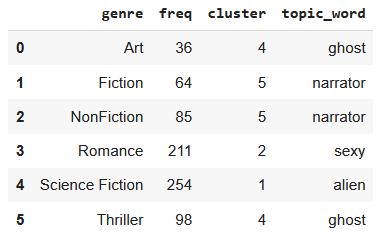

As it can be seen there are some words that seem to be semantically strictly connected with some genres, like ghost and narrator

## Considerations on TF-IDF values on unigrams, bigrams and trigrams

In [138]:
# convert into numpy array with todense()
tfidf_values = pd.DataFrame(matrix[32].T.todense(),
                            index=tfidf.get_feature_names(), columns=["TF-IDF"]) 
tfidf_values = tfidf_values.sort_values('TF-IDF', ascending=False)
tfidf_values[:10]

,TF-IDF
willow,0.338091
issue,0.247000
downturn,0.219007
fray,0.195895
mediocrity,0.193120
totally,0.190732
sever,0.190637
future,0.182347
gimmick,0.181082
cutesy,0.179562


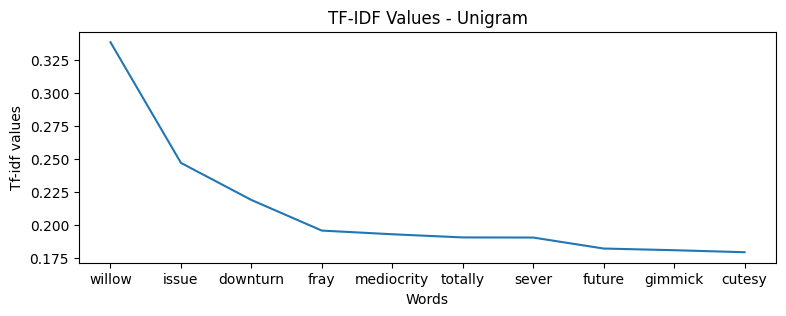

In [139]:
p = [x for x in tfidf_values.values][:10]
n = [x for x in tfidf_values.index][:10]
plt.figure(figsize=(9,3))
plt.title("TF-IDF Values - Unigram")
plt.xlabel("Words")
plt.ylabel("Tf-idf values")
plt.plot(n,p)
plt.show()

The higher the TF-IDF score the more important/ relevant the term is. When a term gets less relevant, its TF-IDF score will tend to 0. 

In [140]:
corpus = rev_df['lemmatized_joined']

In [141]:
# initialize tfidf considering bigrams
tfidf_bi = TfidfVectorizer(ngram_range = (2,2))
matrix_bi = tfidf_bi.fit_transform(corpus)

tfidf_values_bi = pd.DataFrame(matrix_bi[42].T.todense(),
                               index=tfidf_bi.get_feature_names(), columns=["TF-IDF_Bigrams"]) 
tfidf_values_bi = tfidf_values_bi.sort_values('TF-IDF_Bigrams', ascending=False)

In [142]:
tfidf_values_bi[0:5]

,TF-IDF_Bigrams
child soldier,0.182949
strangeness actually,0.095465
nature big,0.095465
total caricature,0.095465
village child,0.095465


In [143]:
tfidf_values_bi[70:75]

,TF-IDF_Bigrams
southeast asian,0.091474
like stereotype,0.091474
manage interesting,0.091474
one depth,0.091474
stop help,0.091474


In [144]:
# initialize tfidf considering bigrams
tfidf_tri = TfidfVectorizer(ngram_range = (3,3))
matrix_tri = tfidf_tri.fit_transform(corpus)

tfidf_values_tri = pd.DataFrame(matrix_tri[42].T.todense(),
                                index=tfidf_tri.get_feature_names(), columns=["TF-IDF_Trigrams"]) 
tfidf_values_tri = tfidf_values_tri.sort_values('TF-IDF_Trigrams', ascending=False)

In [145]:
tfidf_values_tri[:5]

,TF-IDF_Trigrams
base story picture,0.091236
keep read overly,0.091236
caricature honestly twin,0.091236
manage interesting author,0.091236
military plus child,0.091236


In both bigrams and trigrams , the tf-idf values are similar except for "child soldier" which is considered more important

In [146]:
tfidf_values_tri[85:90]

,TF-IDF_Trigrams
sweep battle nature,0.091236
fuck idea end,0.091236
pregnant wife order,0.091236
end let fuck,0.091236
good white guysoldier,0.091236


## Sentiment Analysis
Testing on lemmatized text because of fewer tokens per documents (It will be tested on the original sentences later)

In [147]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [148]:
# For 12.000 records it requires half an hour or so
sample_sentiment = rev_df['lemmatized_joined']
index_sample = sample_sentiment.index

In [149]:
start = time.time()
sentiment_score(sample_sentiment.loc[index_sample[0]])
end = time.time()
print(end-start)

3.9002795219421387


In [150]:
sentiment_result = sample_sentiment.swifter.apply(lambda x: sentiment_score(x[:512]))

Pandas Apply:   0%|          | 0/12000 [00:00<?, ?it/s]

In [151]:
sentiment_df = pd.concat((rev_df['review_text'].loc[index_sample], sentiment_result), axis= 1).rename(columns={'lemmatized_joined':"sentiment"}).reset_index(drop=True)

In [152]:
sentiment_df.head()

,review_text,sentiment
0,"better than the last book, this one moves the ...",3
1,great art and a very solid intro into this cha...,4
2,"stuff ended on kind of a weird note in volume,...",2
3,seeing batman's methods of taking down his jla...,3
4,i won't get into the details. everybody who ma...,4


In [153]:
sentiment_df.loc[sentiment_df.index[1]]['review_text'], sentiment_df.loc[sentiment_df.index[1]]['sentiment']

("great art and a very solid intro into this character. i've never read any of before. i never even heard of her before. but now that i have, i'm sure i'm going to tear through quite a bit more and really catch up because she's kinda psycho cool. there's less unjustified family angst in her story than most marvel heroines, too. it's a great selling point. a remarkably dense amount of information followed these six comics that even managed to jam in a nice character quest at the last minute. we'll see how it goes!",
 4)

In [154]:
sentiment_df.loc[sentiment_df.index[3]]['review_text'], sentiment_df.loc[sentiment_df.index[3]]['sentiment']

("seeing batman's methods of taking down his jla teammates is always fun, but also involves some weak plot points. talia and ra's al ghul's ability to fool the automated defences in both the jla watchtower and the batcave were entirely too easy and not believable. same goes for the takedowns of green lantern and wonder woman. the mechanics of ra's al ghul's titular tactic of messing with the language centers of everyone's brains on earth was a bit sloppy and counterintuitive. basically, this book is a clear example of a writer coming up with a premise and a beautiful disaster, but struggling to fill in the steps of how we get there. i may have enjoyed the feature animated film justice league doom, which was loosely based on this comic arc, more than the book plotted by mark waid",
 3)

### Checking Ratings-Sentiment Metrics and Correlation
Trying to see if the sentiment analysis is a good predictor of the ratings:

It seems it is not

In [155]:
from sklearn.metrics import classification_report

sentiment_df['rating'] = rev_df.rating.replace(0, 1)

print(classification_report(sentiment_df.rating, sentiment_df.sentiment))

              precision    recall  f1-score   support

           1       0.09      0.65      0.16       526
           2       0.19      0.24      0.21      1113
           3       0.36      0.26      0.30      3033
           4       0.49      0.27      0.35      4400
           5       0.52      0.38      0.44      2928

    accuracy                           0.31     12000
   macro avg       0.33      0.36      0.29     12000
weighted avg       0.42      0.31      0.34     12000



In [156]:
sentiment_df.corr()

,sentiment,rating
sentiment,1.000000,0.311293
rating,0.311293,1.000000


## WorldCloud

In [157]:
def generate_wordcloud_genre(df, genre, avoid_first = 20):
    f = frequency_per_genre(df, genre, avoid_first)
    mask = np.array(Image.open(genre + ".png"))
    wc = WordCloud(background_color="white", 
                   max_words=200, max_font_size=100, 
                   random_state=42, mask = mask).generate_from_frequencies(f)
    plt.figure(figsize=(20,6))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.title(genre)
    plt.axis("off")
    plt.show()

In [158]:
# Downloading pictures for word clouds
fiction_url = 'https://cdn-icons-png.flaticon.com/512/523/523813.png'
art_url = 'https://www.freepnglogos.com/uploads/ghost-png/creepy-ghost-svg-png-icon-download-24.png'
mystery_url = 'https://assets-global.website-files.com/5eea2efbaac9091a52bc9645/625fbd4ad3c560021d7a058b_lente%20mobile.png'
romance_url = 'https://cdn-icons-png.flaticon.com/512/1216/1216686.png'
scifi_url = 'https://cdn-icons-png.flaticon.com/512/190/190276.png'

genre_url = {'Fiction' : fiction_url, 'Art' : art_url, 
             'Mystery' : mystery_url, 'Romance' : romance_url, 
             'Science Fiction' : scifi_url}

for genre, url in genre_url.items():
    urllib.request.urlretrieve(url, genre + '.png')

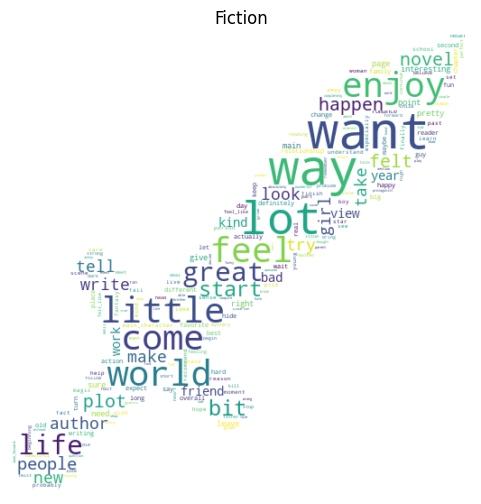

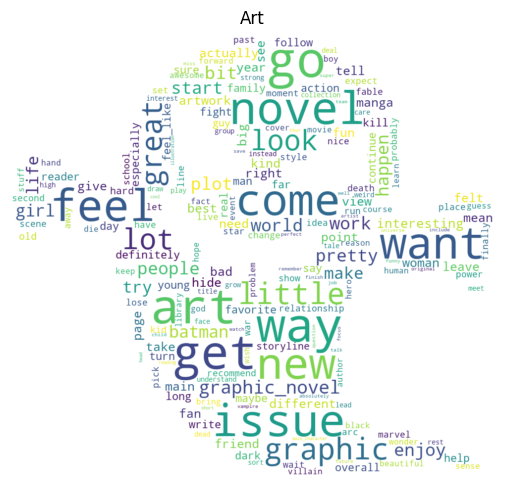

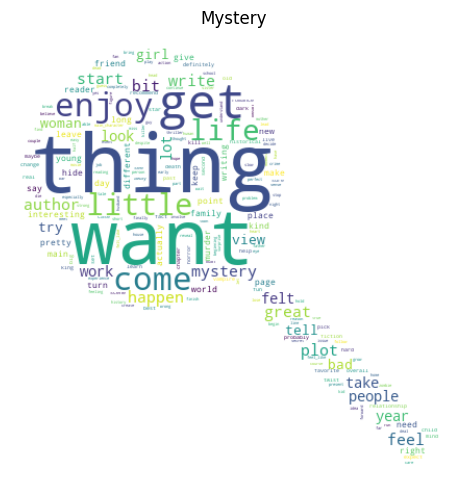

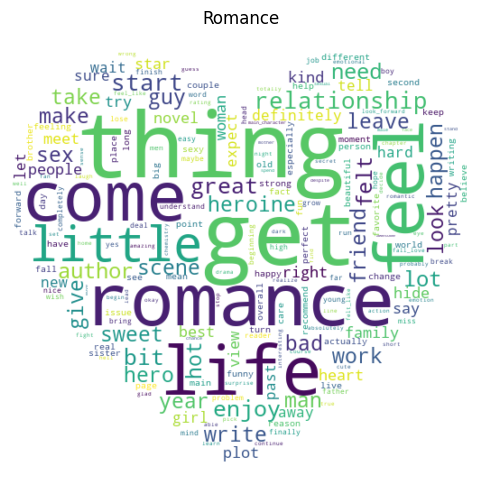

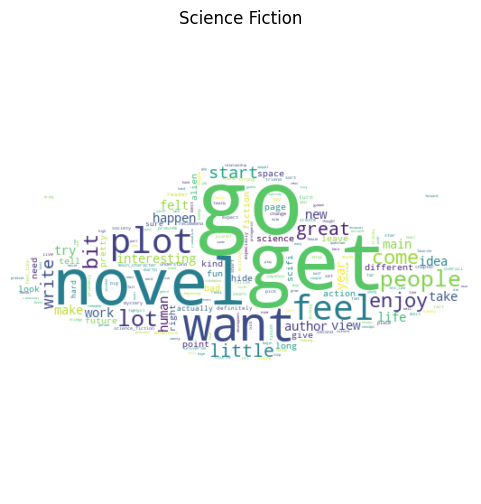

In [159]:
for genre in genre_url.keys():
    generate_wordcloud_genre(rev_df, genre, 15)

# Preprocessing the Test Set

In [225]:
train_df = rev_df[['review_text', 'genre', 'book_id']]

In [161]:
# loading and preprocessing the test set (also renaming and filtering the classes of the target variables we want)
test_df = df_test[['review_text', 'genre', 'book_id']].dropna().reset_index(drop=True)
test_df = test_df[test_df.genre.isin(genres_to_keep_dict.keys())].reset_index(drop=True)
test_df['genre'] = test_df.genre.map(lambda genre: genres_to_keep_dict[genre])
test_df['genre'] = test_df.genre.map(lambda genre: new_genres[genre])
test_df['review_text'] = test_df.review_text.swifter.apply(lambda x: clean_tokens(x))

print(f'Number of Rows: {len(test_df)}')

Pandas Apply:   0%|          | 0/373299 [00:00<?, ?it/s]

Number of Rows: 373299


In [162]:
test_df.head()

,review_text,genre,book_id
0,alert this is definitely one of my favorites a...,Fiction,7092507
1,alert you are what you drink. i'm a huge fan o...,Fiction,5576654
2,roar is one of my favorite characters in under...,Fiction,15754052
3,alert if you feel like travelling to europe an...,Fiction,17020
4,i read and enjoyed the first two novels from t...,Fiction,12551082


# Classification

# BERT: hyperparameter tuning (Do not Run)

## Initial Setups

In [180]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

mpl.use('Agg')
sns.set()

### Checking the GPU

In [181]:
def check_for_gpu():
    if torch.cuda.is_available():       
        device = torch.device("cuda")
        print(f'There are {torch.cuda.device_count()} GPU(s) available.')
        print('We will use the GPU:', torch.cuda.get_device_name(0))
    else:
        print('No GPU available, using the CPU instead.')
        device = torch.device("cpu")
    return device

In [182]:
device = check_for_gpu()
device

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


device(type='cuda')

In [183]:
train_df.genre.value_counts()

Art                2000
Fiction            2000
Mystery            2000
NonFiction         2000
Romance            2000
Science Fiction    2000
Name: genre, dtype: int64

### Getting the input

In [184]:
x_train = [row for row in train_df["review_text"]]
y_train = [row for row in train_df["genre"]]

x_test = [row for row in test_df["review_text"]]
y_test = [row for row in test_df["genre"]]

In [185]:
len(x_train),len(y_train),len(x_test),len(y_test)

(12000, 12000, 373299, 373299)

In [186]:
train_df.genre.value_counts()

Art                2000
Fiction            2000
Mystery            2000
NonFiction         2000
Romance            2000
Science Fiction    2000
Name: genre, dtype: int64

In [187]:
test_df.genre.value_counts()

Fiction            213931
Romance             77884
Mystery             36651
Science Fiction     17822
NonFiction          14379
Art                 12632
Name: genre, dtype: int64

### Encoding the Target Variable

In [188]:
le = LabelEncoder()

le.fit(y_train)
print(le.classes_)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

y_test

['Art' 'Fiction' 'Mystery' 'NonFiction' 'Romance' 'Science Fiction']


array([1, 1, 1, ..., 4, 1, 1])

### Transformer Inizialization

In [189]:
# Load the BERT tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [190]:
# Print the original sentence.
print('Original: \n', x_train[0],"\n")

# Print the sentence split into tokens.
print('Tokenized: \n', tokenizer.tokenize(x_train[0]),"\n")

# Print the sentence mapped to token ids.
print('Token IDs: \n', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(x_train[0])))

Original: 
 better than the last book, this one moves the plot forward more, and ntroduces us to the dead presidents monster government agents. so far, they're kinda the most interesting thing about the series. once again, we're kinda ixnay on the etectivingday it's really more an actionhorrorromp kinda thing. which is fine but i wish they didn't bill it as a mysterydetective story. um let's see. gramps went up a bit in my estimation, but ellie went down. i mean, view obviously corpselooking dude running around naked and barely able to form words, and she's like did the zombies scare you witless hide herpa derp. speaking of derping view people go missing for days, and gwen's all oblivious and people go missing for days and have no obvious sideeffects from, ya know, not eating or having water or anything hide anyway i hadn't mentioned much about the art in the past books, aside from the weird preponderance of unnecessary nudity in the first book. one thing i forgot to mention was that p

#### BERT Requirements:
- Add special tokens at the beginning and the end of each Tokenized text: `[CLS]` and `[SEP]`
- Set token lenght to a fixed amount
- Make artificial token explicit with the attention mask

In [191]:
from tqdm.notebook import tqdm

def ids_attention_masks(_input: list, MAX_LEN:int = 100) -> (list,list):
    
    """ Tokenizes text with '[CLS]' and '[SEP]' tokens and creates relatives masks """
    
    input_ids = []
    attention_masks = []
    
    for review in tqdm(_input):
        encoded_dict = tokenizer.encode_plus(
                            review,                        # Review to encode.
                            add_special_tokens = True,     # Add '[CLS]' and '[SEP]'
                            max_length = MAX_LEN,          # Pad & truncate all sentences.
                            pad_to_max_length = True,      # (padding = "max_length" dives error later on)
                            return_attention_mask = True,  # Construct attention masks.
                            return_tensors = 'pt')         # Return pytorch tensors.
            
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    return input_ids, attention_masks

In [192]:
def splitting_train_val_with_masks(ids_train: list, amasks_train: list, labels_train: list):

    """ Return splitted Train_set and Validation_set with relatives masks"""
    
    (train_inputs, validation_inputs,
     train_labels, validation_labels) = train_test_split(ids_train, labels_train,
                                                         random_state=42,
                                                         test_size=0.20)
    (train_masks, validation_masks,
     _, _) = train_test_split(amasks_train, ids_train,
                              random_state=42, test_size=0.20)
     
    return train_inputs, train_labels, validation_inputs, validation_labels, train_masks, validation_masks

In [193]:
def to_tensor(*args) -> tuple:
    """ Transforms multiple dim. lists and 1 dim. arrays to tensors """
    return tuple( torch.cat(el, dim=0) if type(el) == list else torch.tensor(el) for el in args  )

In [194]:
input_ids_train, attention_masks_train = ids_attention_masks(x_train)

  0%|          | 0/12000 [00:00<?, ?it/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [195]:
input_ids_test, attention_masks_test = ids_attention_masks(x_test)

  0%|          | 0/373299 [00:00<?, ?it/s]

In [196]:
len(input_ids_train), len(attention_masks_train), len(y_train)

(12000, 12000, 12000)

### Spitting Training to Train/Validation

***Retrieving Validation Inputs, Masks and Labels***

In [197]:
(train_inputs, 
train_labels, 
val_inputs, 
val_labels, 
train_masks, 
val_masks) = splitting_train_val_with_masks(input_ids_train, attention_masks_train, y_train)

***Converting lists to Tensors***

In [198]:
# Convert the lists into tensors.
train_inputs, train_masks, train_labels = to_tensor(train_inputs, train_masks, train_labels)

validation_inputs, validation_masks, validation_labels = to_tensor(val_inputs, val_masks, val_labels)

test_inputs, test_masks, test_labels = to_tensor(input_ids_test, attention_masks_test, y_test)

In [199]:
len(train_inputs), len(train_masks), len(train_labels)

(9600, 9600, 9600)

## Setting a Tensor Dataset

In [200]:
batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size) #CPU to GPU

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [201]:
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


print(f"Train_set: \t{len(train_data)} reviews \n" +
      f"Val_set: \t{len(validation_data)} reviews \n" +
      f"Test_data: \t{len(test_data)} reviews")

Train_set: 	9600 reviews 
Val_set: 	2400 reviews 
Test_data: 	373299 reviews


## Building the Trainer

In [202]:
model_name = "bert-base-uncased"
bert_BU_model = BertForSequenceClassification.from_pretrained(model_name, num_labels= len(le.classes_))

# Make it run on GPU
bert_BU_model.cuda()

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

***Setting up Optimizer and Scheduler***

In [203]:
def get_optimizer_scheduler(model, epochs: int, weight_decay: float, learning_rate: float):
    """ Returning optimizer and scheduler of the model for the current input Hyperparameters"""

    warmup_steps = int(0.2*len(train_dataloader))
    no_decay = ['bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
                                    {'params': [tensor for parameter, tensor in model.named_parameters()
                                                if not any(el in parameter for el in no_decay)],
                                     'weight_decay': weight_decay},
                                    {'params': [tensor for parameter, tensor in model.named_parameters()
                                                if any(el in parameter for el in no_decay)],
                                     'weight_decay': 0.0}
                                    ]

    optimizer = AdamW(optimizer_grouped_parameters, lr= learning_rate, eps= 1e-8, no_deprecation_warning=True)
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps= warmup_steps,
                                     num_training_steps =len(train_dataloader)*epochs)
    return optimizer, scheduler

In [204]:
def train(model, optimizer, scheduler, epochs, loss_vector=None, log_interval=200):
    # Set model to training mode
    model.train()

    total_train_loss = 0
    # Loop over each batch from the training set
    for step, batch in enumerate(train_dataloader):

        batch = tuple(t.to(device) for t in batch)         # Copy data to GPU if needed
        b_input_ids, b_input_mask, b_labels = batch        # Unpack the inputs from our dataloader
        optimizer.zero_grad()                              # Zero gradient buffers

        # Forward pass
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        
        loss = outputs[0]
        if loss_vector is not None: loss_vector.append(loss.item())
        # total_train_loss += loss.item()

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()
        scheduler.step()

        if step % log_interval == 0:
            print(f'Train Epoch: {epochs} [{step * len(b_input_ids)}/{len(train_dataloader.dataset)}' +
                  f'({100. * step / len(train_dataloader):.0f}%)]\tLoss: {loss:.6f}')
            
    # if loss_vector is not None: loss_vector.append(total_train_loss / len(train_dataloader))



def evaluate(model, loader, loss_vector=None):
    model.eval()
    n_correct, n_all = 0, 0
    predicted_labels, true_labels = list(), list()
    full_predictions, full_labels = np.array([]), np.array([])
    
    logits_res = []
    for batch in loader:
        
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids, 
                            token_type_ids=None,
                            attention_mask=b_input_mask,
                            labels=b_labels)

        loss = outputs[0]
        if loss_vector is not None: loss_vector.append(loss.item())

        logits = outputs[1]
        logits = logits.detach().cpu().numpy()
        logits_res.append(logits)
        predictions = np.argmax(logits, axis=1)

        labels = b_labels.to('cpu').numpy()
        n_correct += np.sum(predictions == labels)

        true_labels.extend(labels)
        predicted_labels.extend(predictions)

        full_predictions = np.concatenate((full_predictions, predictions), axis=0)
        full_labels = np.concatenate((full_labels, labels), axis=0)
        n_all += len(labels)
    
    logits_res = [array for el in logits_res for array in el.tolist()]
    f1_score = f1(full_labels, full_predictions, average="macro")
    # print(f'F1 Score: {f1_score:.4f}')
    # print(f'Accuracy: [{n_correct}/{n_all}] {(n_correct/n_all):.4f}')
    # print('Classification report:')
    # print(classification_report(true_labels, predicted_labels))
    # print('Confusion matrix:')
    # cm = confusion_matrix(true_labels, predicted_labels)
    # print(cm)
    return f1_score, true_labels, predicted_labels, logits_res

## Hyperparameter Tuning

In [205]:
def hypter_param_selection(input_params: list, n_classes: int, validation_dataloader, model_name):
    
    """ 
    Hyper parameters tuning on Validation set.
    Returns a dict of scores for each params combination.
    """
    
    epochs = 4
    params_list = input_params.keys()
    res = dict()
    
    #cartesian product of the params
    for param in itertools.product(*[param for param in input_params.values()]):
        current_params_dict = dict(zip(params_list, param))
        print(f"Hyperparameters --> {current_params_dict}")
        
        #initialize the model, retrieving Optimizer and Scheduler
        model = BertForSequenceClassification.from_pretrained(model_name, num_labels = n_classes)   
        model.cuda()
        optimizer, scheduler = get_optimizer_scheduler(model, epochs, *current_params_dict.values())
        
        #training on validation
        f1_mean = float(0)
        for epoch in range(1, epochs + 1):
            train(model, optimizer, scheduler, epoch)
            f1_score, _, _, _  = evaluate(model, validation_dataloader)
            f1_mean += f1_score
        f1_mean /= epochs

        res.update({str(current_params_dict) : f1_mean})          
    return res

In [ ]:
param_grid = {
              'weight_decay': [0.01, 0.1, 0.001], 
              'lr': [2e-5, 3e-5, 4e-5]
             }

res = hypter_param_selection(param_grid, 10, validation_dataloader, model_name)

Hyperparameters --> {'weight_decay': 0.01, 'lr': 2e-05}


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Train Epoch: 1 [0/9600(0%)]	Loss: 2.232619
Train Epoch: 1 [6400/9600(67%)]	Loss: 1.177053
Train Epoch: 2 [0/9600(0%)]	Loss: 1.087307
Train Epoch: 2 [6400/9600(67%)]	Loss: 0.695333
Train Epoch: 3 [0/9600(0%)]	Loss: 0.826209
Train Epoch: 3 [6400/9600(67%)]	Loss: 0.456161
Train Epoch: 4 [0/9600(0%)]	Loss: 0.598634
Train Epoch: 4 [6400/9600(67%)]	Loss: 0.302404
Hyperparameters --> {'weight_decay': 0.01, 'lr': 3e-05}


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Train Epoch: 1 [0/9600(0%)]	Loss: 2.355973
Train Epoch: 1 [6400/9600(67%)]	Loss: 1.059198
Train Epoch: 2 [0/9600(0%)]	Loss: 0.722096
Train Epoch: 2 [6400/9600(67%)]	Loss: 0.547901
Train Epoch: 3 [0/9600(0%)]	Loss: 0.436388
Train Epoch: 3 [6400/9600(67%)]	Loss: 0.417493
Train Epoch: 4 [0/9600(0%)]	Loss: 0.304804
Train Epoch: 4 [6400/9600(67%)]	Loss: 0.303873
Hyperparameters --> {'weight_decay': 0.01, 'lr': 4e-05}


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Train Epoch: 1 [0/9600(0%)]	Loss: 2.544617
Train Epoch: 1 [6400/9600(67%)]	Loss: 1.027846
Train Epoch: 2 [0/9600(0%)]	Loss: 1.053838
Train Epoch: 2 [6400/9600(67%)]	Loss: 0.889036
Train Epoch: 3 [0/9600(0%)]	Loss: 0.367705
Train Epoch: 3 [6400/9600(67%)]	Loss: 0.204132
Train Epoch: 4 [0/9600(0%)]	Loss: 0.464941
Train Epoch: 4 [6400/9600(67%)]	Loss: 0.077920
Hyperparameters --> {'weight_decay': 0.1, 'lr': 2e-05}


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Train Epoch: 1 [0/9600(0%)]	Loss: 2.425396
Train Epoch: 1 [6400/9600(67%)]	Loss: 1.149930
Train Epoch: 2 [0/9600(0%)]	Loss: 1.186842
Train Epoch: 2 [6400/9600(67%)]	Loss: 0.917086
Train Epoch: 3 [0/9600(0%)]	Loss: 0.642818
Train Epoch: 3 [6400/9600(67%)]	Loss: 0.819371
Train Epoch: 4 [0/9600(0%)]	Loss: 0.340987
Train Epoch: 4 [6400/9600(67%)]	Loss: 0.648629
Hyperparameters --> {'weight_decay': 0.1, 'lr': 3e-05}


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Train Epoch: 1 [0/9600(0%)]	Loss: 2.283876
Train Epoch: 1 [6400/9600(67%)]	Loss: 1.076296
Train Epoch: 2 [0/9600(0%)]	Loss: 0.729796
Train Epoch: 2 [6400/9600(67%)]	Loss: 0.584997
Train Epoch: 3 [0/9600(0%)]	Loss: 0.580153
Train Epoch: 3 [6400/9600(67%)]	Loss: 0.288256
Train Epoch: 4 [0/9600(0%)]	Loss: 0.250516
Train Epoch: 4 [6400/9600(67%)]	Loss: 0.603794
Hyperparameters --> {'weight_decay': 0.1, 'lr': 4e-05}


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Train Epoch: 1 [0/9600(0%)]	Loss: 2.457422
Train Epoch: 1 [6400/9600(67%)]	Loss: 0.877852
Train Epoch: 2 [0/9600(0%)]	Loss: 0.726300
Train Epoch: 2 [6400/9600(67%)]	Loss: 0.657920
Train Epoch: 3 [0/9600(0%)]	Loss: 0.373791
Train Epoch: 3 [6400/9600(67%)]	Loss: 0.405170
Train Epoch: 4 [0/9600(0%)]	Loss: 0.414205
Train Epoch: 4 [6400/9600(67%)]	Loss: 0.348936
Hyperparameters --> {'weight_decay': 0.001, 'lr': 2e-05}


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Train Epoch: 1 [0/9600(0%)]	Loss: 2.435024
Train Epoch: 1 [6400/9600(67%)]	Loss: 1.238826
Train Epoch: 2 [0/9600(0%)]	Loss: 1.015798
Train Epoch: 2 [6400/9600(67%)]	Loss: 0.826245
Train Epoch: 3 [0/9600(0%)]	Loss: 0.526537
Train Epoch: 3 [6400/9600(67%)]	Loss: 0.573387
Train Epoch: 4 [0/9600(0%)]	Loss: 0.513496
Train Epoch: 4 [6400/9600(67%)]	Loss: 0.263481
Hyperparameters --> {'weight_decay': 0.001, 'lr': 3e-05}


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Train Epoch: 1 [0/9600(0%)]	Loss: 2.318721
Train Epoch: 1 [6400/9600(67%)]	Loss: 1.090254
Train Epoch: 2 [0/9600(0%)]	Loss: 0.891193
Train Epoch: 2 [6400/9600(67%)]	Loss: 0.677954
Train Epoch: 3 [0/9600(0%)]	Loss: 0.489326
Train Epoch: 3 [6400/9600(67%)]	Loss: 0.653357
Train Epoch: 4 [0/9600(0%)]	Loss: 0.319318
Train Epoch: 4 [6400/9600(67%)]	Loss: 0.143199
Hyperparameters --> {'weight_decay': 0.001, 'lr': 4e-05}


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Train Epoch: 1 [0/9600(0%)]	Loss: 2.362069
Train Epoch: 1 [6400/9600(67%)]	Loss: 1.168229
Train Epoch: 2 [0/9600(0%)]	Loss: 1.069485
Train Epoch: 2 [6400/9600(67%)]	Loss: 0.894516
Train Epoch: 3 [0/9600(0%)]	Loss: 0.334540
Train Epoch: 3 [6400/9600(67%)]	Loss: 0.417141
Train Epoch: 4 [0/9600(0%)]	Loss: 0.084332
Train Epoch: 4 [6400/9600(67%)]	Loss: 0.185453


In [ ]:
res

{"{'weight_decay': 0.01, 'lr': 2e-05}": 0.6699045175009564,
 "{'weight_decay': 0.01, 'lr': 3e-05}": 0.6759502158421645,
 "{'weight_decay': 0.01, 'lr': 4e-05}": 0.67737765261448,
 "{'weight_decay': 0.1, 'lr': 2e-05}": 0.6704321267648828,
 "{'weight_decay': 0.1, 'lr': 3e-05}": 0.6756271467629933,
 "{'weight_decay': 0.1, 'lr': 4e-05}": 0.6624165687540219,
 "{'weight_decay': 0.001, 'lr': 2e-05}": 0.6692461138570338,
 "{'weight_decay': 0.001, 'lr': 3e-05}": 0.6769361258048985,
 "{'weight_decay': 0.001, 'lr': 4e-05}": 0.6738437604599368}

In [ ]:
# retrieving a dictionary of best params, adding 3 epochs as last
best_parameters_str = max(res, key=res.get)
best_params = ast.literal_eval("{" + "'epoch': 3, " + best_parameters_str[1:])

best_params

{'epoch': 3, 'weight_decay': 0.01, 'lr': 4e-05}

In [ ]:
bert_BU_model = BertForSequenceClassification.from_pretrained(model_name, num_labels= len(le.classes_))   
bert_BU_model.cuda()
optimizer, scheduler= get_optimizer_scheduler(bert_BU_model, *best_params.values())

#evaluating on test
train_lossv = list()
for epoch in range(1, best_params["epoch"] + 1):
    print()
    train(bert_BU_model, optimizer, scheduler, epoch, train_lossv)
    f1_score, _, _, _ = evaluate(bert_BU_model, test_dataloader)   #true_labels, predicted_labels, logits

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


Train Epoch: 1 [0/9600(0%)]	Loss: 1.734190
Train Epoch: 1 [6400/9600(67%)]	Loss: 1.061995

Train Epoch: 2 [0/9600(0%)]	Loss: 0.770429
Train Epoch: 2 [6400/9600(67%)]	Loss: 0.790559

Train Epoch: 3 [0/9600(0%)]	Loss: 0.429820
Train Epoch: 3 [6400/9600(67%)]	Loss: 0.314664


In [ ]:
f1_score_train, _, _, _ = evaluate(bert_BU_model, train_dataloader)
f1_score_train

0.9291664500031699

In [ ]:
f1_score_test, true_labels, predicted_labels, logits = evaluate(bert_BU_model, test_dataloader)
f1_score_test

0.4847160975625509

In [ ]:
len(logits), len(true_labels), len(predicted_labels)

(373300, 373300, 373300)

In [ ]:
print('Classification report:')
print(classification_report(true_labels, predicted_labels))
print('Confusion matrix:')
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

Classification report:
              precision    recall  f1-score   support

           0       0.47      0.71      0.57     12633
           1       0.81      0.44      0.57    213931
           2       0.29      0.57      0.39     26909
           3       0.29      0.65      0.40     24121
           4       0.55      0.65      0.60     77884
           5       0.28      0.62      0.38     17822

    accuracy                           0.53    373300
   macro avg       0.45      0.61      0.48    373300
weighted avg       0.65      0.53      0.54    373300

Confusion matrix:
[[ 9009   862   611   801   727   623]
 [ 7397 95020 26789 27793 34349 22583]
 [  721  3740 15261  2782  2763  1642]
 [  446  3174  1715 15743  1915  1128]
 [ 1219 11857  6395  5447 50442  2524]
 [  453  2560  1315  1417  1093 10984]]


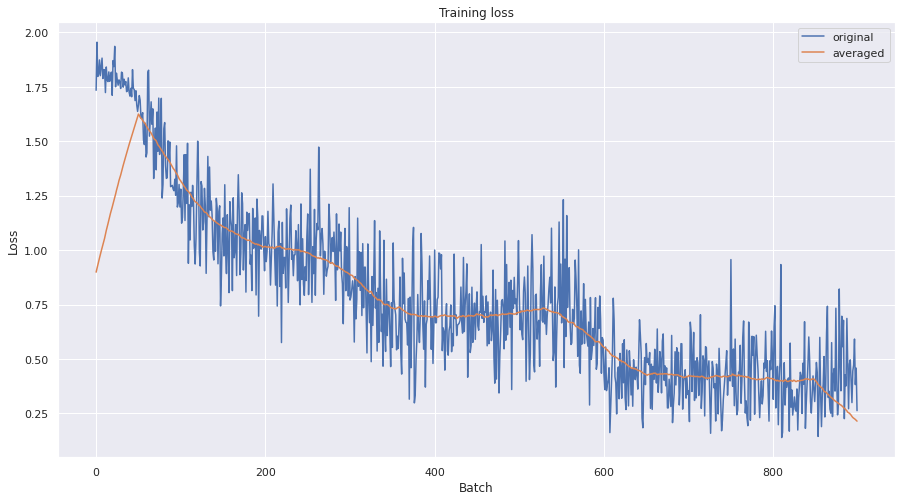

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_lossv, label='original')
plt.plot(np.convolve(train_lossv, np.ones(101), 'same') / 101,
         label='averaged')
plt.legend(loc='best')
plt.show()

# Building a Dataset Object

In [206]:
class_names = list(set(train_df['genre']))
class_labels = ClassLabel(names=class_names)
features = Features({'text': Value('string'), 'label': class_labels})

In [207]:
training_df = train_df.rename(columns={"review_text": "text", "genre": "label"})
training_set = Dataset.from_pandas(training_df[['text','label']], preserve_index = False, features = features)
training_set

Dataset({
    features: ['text', 'label'],
    num_rows: 12000
})

In [208]:
# 70% train + 30% validation
training_set = training_set.train_test_split(test_size=0.3, seed = 42)

In [209]:
training_set

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8400
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3600
    })
})

In [210]:
#setting up the test set
test_df = test_df.rename(columns={"review_text": "text", "genre": "label"})

test_set = Dataset.from_pandas(test_df[['text','label']], preserve_index = False, features = features)
test_set

Dataset({
    features: ['text', 'label'],
    num_rows: 373299
})

In [211]:
# gather everyone if you want to have a single DatasetDict
dataset = DatasetDict({
    'train': training_set['train'],
    'valid': training_set['test'],
    'test': test_set})
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8400
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 3600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 373299
    })
})

# BERT: lighter version (Run this)

## Preprocessing

In [212]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

  0%|          | 0/9 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/374 [00:00<?, ?ba/s]

## Preparing the model and evaluation

In [213]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", 
                                                           num_labels=len(set(dataset['train']['label'])))

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [214]:
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    return {"accuracy": accuracy.compute(predictions=predictions, references=labels)['accuracy'], 
            "f1 weighted": f1.compute(predictions=predictions, references=labels, average="weighted")["f1"]}


## Set up the training

In [215]:
args = TrainingArguments(
    f"output_dir", 
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3
)

In [216]:
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['valid'],
    compute_metrics=compute_metrics,
)

## Training the model

In [217]:
trainer.train()

***** Running training *****
  Num examples = 8400
  Num Epochs = 3
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 6300
  Number of trainable parameters = 108314886
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


Epoch,Training Loss,Validation Loss,Accuracy,F1 weighted
1,1.050700,1.046303,0.637500,0.640587


***** Running Evaluation *****
  Num examples = 3600
  Batch size = 4
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
Saving model checkpoint to output_dir/checkpoint-2100
Configuration saved in output_dir/checkpoint-2100/config.json
Model weights saved in output_dir/checkpoint-2100/pytorch_model.bin


Epoch,Training Loss,Validation Loss,Accuracy,F1 weighted
1,1.050700,1.046303,0.637500,0.640587
2,0.854300,0.985728,0.697222,0.697433
3,0.557700,1.246738,0.716389,0.716055


***** Running Evaluation *****
  Num examples = 3600
  Batch size = 4
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
Saving model checkpoint to output_dir/checkpoint-4200
Configuration saved in output_dir/checkpoint-4200/config.json
Model weights saved in output_dir/checkpoint-4200/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3600
  Batch size = 4
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
Saving model checkpoint to output_dir/checkpoint-6300
Configuration saved in output_dir/checkpoint-6300/config.json
Model weights saved in output_dir/checkpoint

TrainOutput(global_step=6300, training_loss=0.8623599533807663, metrics={'train_runtime': 3060.5523, 'train_samples_per_second': 8.234, 'train_steps_per_second': 2.058, 'total_flos': 6630636721766400.0, 'train_loss': 0.8623599533807663, 'epoch': 3.0})

In [218]:
predictions = trainer.predict(tokenized_datasets['train'])

***** Running Prediction *****
  Num examples = 8400
  Batch size = 4
The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


# LSTM on Prediction Probabilities

## On Training Set (+ Fitting LSTM)

In [219]:
probabilities = [[(e**(logit))/(1+e**(logit)) for logit in prediction] for prediction in predictions.predictions]
probabilities[:2]

[[0.3184185533063032,
  0.10919850890682373,
  0.2157045099079134,
  0.05072600283395646,
  0.3145548832949794,
  0.9971655855157858],
 [0.22764151584854972,
  0.9989442831409382,
  0.20867040264291017,
  0.10321626771258323,
  0.5187712541511155,
  0.1830942056708078]]

In [226]:
prob_df = pd.DataFrame([dataset['train']['text'], probabilities, predictions.label_ids]).T
prob_df.columns = ['review_text', 'probabilities', 'ground_truth']
prob_df['prediction'] = prob_df['probabilities'].transform(lambda x: str(np.argmax(x)))
prob_df = prob_df.merge(train_df, on = 'review_text')

In [227]:
prob_df.head()

,review_text,probabilities,ground_truth,prediction,genre,book_id
0,i honestly don't know if these are getting wor...,"[0.3184185533063032, 0.10919850890682373, 0.21...",5,5,Romance,18730974
1,this was an awesome book. i was engrossed the ...,"[0.22764151584854972, 0.9989442831409382, 0.20...",1,1,Science Fiction,9647532
2,there is a lot more character development here...,"[0.2650478852575261, 0.1199024811495063, 0.132...",4,4,Fiction,15801763
3,oh helios! how he's grown up in this book and ...,"[0.9948701031465127, 0.2543692814699552, 0.109...",0,0,Mystery,10741702
4,this was very different but in a good way. the...,"[0.11916435245721564, 0.11936171894782209, 0.2...",3,3,Art,22374


In [228]:
by_book = pd.DataFrame(prob_df.groupby('book_id')[['probabilities', 'ground_truth']].agg({'probabilities' : lambda x: list(x), 
                                                                                          'ground_truth' : lambda x: list(x)[0]})).reset_index()
                                                                                          
probabilities_per_book = [[list(x) for x in el] for el in by_book['probabilities']]

In [229]:
# Padding and Masking
def pad_series(probabilities_per_book):
    max_length_records = max([len(x) for x in probabilities_per_book])
    dimensions = len(probabilities_per_book[0][0])
    special_value = -10.0
    
    Xpad = np.full((len(probabilities_per_book), max_length_records, dimensions), fill_value=special_value)
    for s, x in enumerate(probabilities_per_book):
        seq_len = np.array(x).shape[0]
        Xpad[s, 0:seq_len, :] = x

    return Xpad

In [230]:
training_books = pad_series(probabilities_per_book)

In [231]:
training_books.shape

(5430, 10, 6)

In [232]:
encoded_originals = []
actual_labels = by_book['ground_truth'].values
for actual_label in actual_labels:
    encoded_originals.append([1 if x == actual_label else 0 for x in range(6)])

encoded_originals = np.array(encoded_originals)

In [233]:
encoded_originals

array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0]])

In [234]:
max_length_records = training_books.shape[1]
dimensions = training_books.shape[2]
special_value = -10.0

model = Sequential()
model.add(Masking(mask_value=special_value, input_shape=(max_length_records, dimensions)))
model.add(LSTM(50, input_shape=(max_length_records, dimensions)))
model.add(Dense(dimensions, activation = 'softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

model.fit(training_books, encoded_originals, epochs=30, validation_split=0.3, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)], batch_size=72, verbose=2, shuffle=False)

Epoch 1/30
53/53 - 8s - loss: 0.6310 - accuracy: 0.2021 - val_loss: 0.5645 - val_accuracy: 0.2920 - 8s/epoch - 155ms/step
Epoch 2/30
53/53 - 0s - loss: 0.5063 - accuracy: 0.3653 - val_loss: 0.4672 - val_accuracy: 0.3951 - 375ms/epoch - 7ms/step
Epoch 3/30
53/53 - 0s - loss: 0.4210 - accuracy: 0.5024 - val_loss: 0.3945 - val_accuracy: 0.4294 - 339ms/epoch - 6ms/step
Epoch 4/30
53/53 - 0s - loss: 0.3555 - accuracy: 0.5155 - val_loss: 0.3382 - val_accuracy: 0.4472 - 349ms/epoch - 7ms/step
Epoch 5/30
53/53 - 0s - loss: 0.3047 - accuracy: 0.6418 - val_loss: 0.2922 - val_accuracy: 0.7061 - 345ms/epoch - 7ms/step
Epoch 6/30
53/53 - 0s - loss: 0.2652 - accuracy: 0.7463 - val_loss: 0.2545 - val_accuracy: 0.8006 - 338ms/epoch - 6ms/step
Epoch 7/30
53/53 - 0s - loss: 0.2330 - accuracy: 0.8089 - val_loss: 0.2226 - val_accuracy: 0.8577 - 335ms/epoch - 6ms/step
Epoch 8/30
53/53 - 0s - loss: 0.2055 - accuracy: 0.8418 - val_loss: 0.1954 - val_accuracy: 0.8656 - 342ms/epoch - 6ms/step
Epoch 9/30
53/53 

In [235]:
genre = model.predict(training_books)

170/170 [==============================] - 2s 2ms/step


In [236]:
predicted_labels = [np.argmax(x) for x in genre]

In [237]:
print(classification_report(actual_labels, predicted_labels, target_names=class_names))

                 precision    recall  f1-score   support

        Mystery       0.92      0.92      0.92      1049
Science Fiction       0.94      0.95      0.95       707
     NonFiction       0.96      0.94      0.95       559
            Art       0.98      0.99      0.98       638
        Fiction       0.90      0.89      0.90      1282
        Romance       0.94      0.94      0.94      1195

       accuracy                           0.93      5430
      macro avg       0.94      0.94      0.94      5430
   weighted avg       0.93      0.93      0.93      5430



## On Validation Set

In [238]:
predictions = trainer.predict(tokenized_datasets['valid'])

***** Running Prediction *****
  Num examples = 3600
  Batch size = 4
The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


In [239]:
probabilities = [[(e**(logit))/(1+e**(logit)) for logit in prediction] for prediction in predictions.predictions]
predicted_gen_reviews = [np.argmax(x) for x in probabilities]
print(classification_report(tokenized_datasets['valid']['label'], predicted_gen_reviews, target_names=class_names))

                 precision    recall  f1-score   support

        Mystery       0.61      0.60      0.61       625
Science Fiction       0.81      0.77      0.79       607
     NonFiction       0.77      0.76      0.77       583
            Art       0.88      0.90      0.89       577
        Fiction       0.52      0.51      0.51       597
        Romance       0.72      0.76      0.74       611

       accuracy                           0.72      3600
      macro avg       0.72      0.72      0.72      3600
   weighted avg       0.72      0.72      0.72      3600



In [240]:
prob_df = pd.DataFrame([dataset['valid']['text'], probabilities, predictions.label_ids]).T
prob_df.columns = ['review_text', 'probabilities', 'ground_truth']
prob_df['prediction'] = prob_df['probabilities'].transform(lambda x: str(np.argmax(x)))
prob_df = prob_df.merge(train_df, on = 'review_text')

In [241]:
by_book = pd.DataFrame(prob_df.groupby('book_id')[['probabilities', 'ground_truth']].agg({'probabilities' : lambda x: list(x), 
                                                                                          'ground_truth' : lambda x: list(x)[0]})).reset_index()
                                                                                          
probabilities_per_book = [[list(x) for x in el] for el in by_book['probabilities']]

In [242]:
validating_books = pad_series(probabilities_per_book)

In [243]:
encoded_originals = []
actual_labels = by_book['ground_truth'].values

for actual_label in actual_labels:
    encoded_originals.append([1 if x == actual_label else 0 for x in range(6)])

encoded_originals = np.array(encoded_originals)

In [244]:
genre = model.predict(validating_books)
predicted_labels = [np.argmax(x) for x in genre]
print(classification_report(actual_labels, predicted_labels, target_names=class_names))

91/91 [==============================] - 1s 2ms/step
                 precision    recall  f1-score   support

        Mystery       0.66      0.60      0.63       536
Science Fiction       0.80      0.76      0.78       438
     NonFiction       0.82      0.71      0.76       368
            Art       0.90      0.90      0.90       402
        Fiction       0.55      0.63      0.58       573
        Romance       0.74      0.78      0.76       576

       accuracy                           0.72      2893
      macro avg       0.74      0.73      0.74      2893
   weighted avg       0.73      0.72      0.72      2893



## Evaluating the model on Test Set

In [ ]:
predictions = trainer.predict(tokenized_datasets['test'])

***** Running Prediction *****
  Num examples = 373300
  Batch size = 4
The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


In [ ]:
probabilities = [[(e**(logit))/(1+e**(logit)) for logit in prediction] for prediction in predictions.predictions]
predicted_gen_reviews = [np.argmax(x) for x in probabilities]
print(classification_report(tokenized_datasets['test']['label'], predicted_gen_reviews, target_names=class_names))

                 precision    recall  f1-score   support

            Art       0.52      0.69      0.59     12633
        Fiction       0.78      0.51      0.61    213931
        Romance       0.56      0.60      0.58     77884
Science Fiction       0.31      0.58      0.40     17822
     NonFiction       0.28      0.62      0.39     24121
        Mystery       0.32      0.55      0.40     26909

       accuracy                           0.55    373300
      macro avg       0.46      0.59      0.50    373300
   weighted avg       0.63      0.55      0.56    373300



In [ ]:
prob_df = pd.DataFrame([dataset['test']['text'], probabilities, predictions.label_ids]).T
prob_df.columns = ['review_text', 'probabilities', 'ground_truth']
prob_df['prediction'] = prob_df['probabilities'].transform(lambda x: str(np.argmax(x)))

In [ ]:
test_to_join = test_df[['text', 'book_id']]
test_to_join.columns = ['review_text', 'book_id']

In [ ]:
prob_df = prob_df.merge(test_to_join, on = 'review_text')

In [ ]:
by_book = pd.DataFrame(prob_df.groupby('book_id')[['probabilities', 'ground_truth']].agg({'probabilities' : lambda x: list(x), 
                                                                                          'ground_truth' : lambda x: list(x)[0]})).reset_index()
                                                                                          
probabilities_per_book = [[list(x) for x in el] for el in by_book['probabilities']]

In [ ]:
test_books = pad_series(probabilities_per_book)

In [ ]:
encoded_originals = []
actual_labels = by_book['ground_truth'].values

for actual_label in actual_labels:
    encoded_originals.append([1 if x == actual_label else 0 for x in range(6)])

encoded_originals = np.array(encoded_originals)

In [ ]:
genre = model.predict(test_books)
predicted_labels = [np.argmax(x) for x in genre]
print(classification_report(actual_labels, predicted_labels, target_names=class_names))

673/673 [==============================] - 11s 16ms/step
                 precision    recall  f1-score   support

            Art       0.71      0.95      0.81       870
        Fiction       0.74      0.04      0.07      9299
        Romance       0.80      0.37      0.51      5925
Science Fiction       0.10      0.94      0.17      1036
     NonFiction       0.30      0.75      0.42      1465
        Mystery       0.48      0.54      0.51      2940

       accuracy                           0.33     21535
      macro avg       0.52      0.60      0.42     21535
   weighted avg       0.66      0.33      0.31     21535



## Trying to imporve predictions by reducing records per book

In [ ]:
by_book['probabilities'].transform(len).max() # maximum number of records for each book

4506

In [ ]:
reduced_by_book = by_book['probabilities'].transform(lambda x: sample(x, 3) if len(x) > 3 else x)
probabilities_per_book = [[list(x) for x in el] for el in reduced_by_book]
test_books = pad_series(probabilities_per_book)

In [ ]:
encoded_originals = []
actual_labels = by_book['ground_truth'].values

for actual_label in actual_labels:
    encoded_originals.append([1 if x == actual_label else 0 for x in range(6)])

encoded_originals = np.array(encoded_originals)

In [ ]:
genre = model.predict(test_books)
predicted_labels = [np.argmax(x) for x in genre]
print(classification_report(actual_labels, predicted_labels, target_names=class_names))

673/673 [==============================] - 2s 2ms/step
                 precision    recall  f1-score   support

            Art       0.59      0.87      0.71       870
        Fiction       0.86      0.24      0.38      9299
        Romance       0.69      0.66      0.68      5925
Science Fiction       0.27      0.82      0.40      1036
     NonFiction       0.30      0.75      0.43      1465
        Mystery       0.46      0.79      0.58      2940

       accuracy                           0.52     21535
      macro avg       0.53      0.69      0.53     21535
   weighted avg       0.68      0.52      0.50     21535



## Using a heuristic to infer the book (Mode)

In [ ]:
by_book = pd.DataFrame(prob_df.groupby('book_id')[['prediction', 'ground_truth']].agg({'prediction' : lambda x: list(x), 
                                                                                       'ground_truth' : lambda x: list(x)[0]})).reset_index()

In [ ]:
by_book.head()

,book_id,prediction,ground_truth
0,1,"[2, 5, 5, 5, 5, 1, 2, 2, 1, 5, 5, 5, 5, 2, 1, ...",1
1,2,"[5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1
2,5,"[1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",1
3,6,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
4,34,"[4, 1, 2, 1, 1, 4, 0, 0, 0, 4, 1, 1, 5, 3, 1, ...",1


In [ ]:
mode_transformed_predict = by_book['prediction'].transform(lambda x: int(Counter(x).most_common(1)[0][0]))

In [ ]:
print(classification_report(actual_labels, mode_transformed_predict, target_names=class_names))

                 precision    recall  f1-score   support

            Art       0.83      0.91      0.87       870
        Fiction       0.69      0.58      0.63      9299
        Romance       0.76      0.69      0.72      5925
Science Fiction       0.54      0.75      0.63      1036
     NonFiction       0.41      0.74      0.53      1465
        Mystery       0.45      0.50      0.47      2940

       accuracy                           0.63     21535
      macro avg       0.61      0.70      0.64     21535
   weighted avg       0.66      0.63      0.64     21535



# Other Classifiers

## Quick Preprocessing for other classifiers

### Getting the lemmatized tokens

In [246]:
def lemmatize_row(row):
    lemmatizer = WordNetLemmatizer()
    lemmatized_row = list()
    
    for token, pos in row:
        if pos is None:
            lemma = lemmatizer.lemmatize(token)
        else:
            lemma = lemmatizer.lemmatize(token, pos = pos)

        lemmatized_row.append(lemma)

    return lemmatized_row

In [247]:
def lemmatization(clean_review):
    tokenized_review = word_tokenize(clean_review)
    postagged_review = nltk.pos_tag(tokenized_review)
    postagged_review_for_lemma = [(tup[0], get_wordnet_pos(tup[1])) if len(tup) == 2 else tup for tup in postagged_review]
    lemmatized_review = lemmatize_row([tup for tup in postagged_review_for_lemma if len(tup[0]) > 2])
    return lemmatized_review

In [248]:
lemmatized_dataset = dataset.map(lambda review: {'text' : review['text'], 
                                                 'label' : review['label'], 
                                                 'lemma' : lemmatization(review['text'])})

  0%|          | 0/8400 [00:00<?, ?ex/s]

  0%|          | 0/3600 [00:00<?, ?ex/s]

  0%|          | 0/373299 [00:00<?, ?ex/s]

### Joining Lemmas and Vectorizing

In [251]:
y_train = lemmatized_dataset['train']['label']
y_valid = lemmatized_dataset['valid']['label']
y_test = lemmatized_dataset['test']['label']

In [259]:
train = [' '.join(x) for x in lemmatized_dataset['train']['lemma']]
valid = [' '.join(x) for x in lemmatized_dataset['valid']['lemma']]
test = [' '.join(x) for x in lemmatized_dataset['test']['lemma']]

## Random Forest

### With Count Vectorizer

In [263]:
vectorizer = CountVectorizer(ngram_range=(1,1))

X_train = vectorizer.fit_transform(train)
X_valid = vectorizer.transform(valid)
X_test = vectorizer.transform(test)

In [264]:
# implement RandomForest Classifier
randomclassifier = RandomForestClassifier(n_estimators=200,criterion='gini')
randomclassifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [265]:
predictionsRF = randomclassifier.predict(X_valid)

In [266]:
print(confusion_matrix(y_valid,predictionsRF), "\n")
print(accuracy_score(y_valid,predictionsRF), "\n")
print(classification_report(y_valid,predictionsRF))

[[258  49 105  37  65 111]
 [ 27 399  55  22  51  53]
 [ 38  27 410  23  33  52]
 [  8  19  19 503  11  17]
 [ 73  61  82  33 185 163]
 [ 23  17  28  12  31 500]] 

0.6263888888888889 

              precision    recall  f1-score   support

           0       0.60      0.41      0.49       625
           1       0.70      0.66      0.68       607
           2       0.59      0.70      0.64       583
           3       0.80      0.87      0.83       577
           4       0.49      0.31      0.38       597
           5       0.56      0.82      0.66       611

    accuracy                           0.63      3600
   macro avg       0.62      0.63      0.61      3600
weighted avg       0.62      0.63      0.61      3600



In [267]:
predictionsRF = randomclassifier.predict(X_test)

In [268]:
print(confusion_matrix(y_test,predictionsRF), "\n")
print(accuracy_score(y_test,predictionsRF), "\n")
print(classification_report(y_test,predictionsRF))

[[ 9969  1889 12642  3499  4004  4648]
 [  662  7761  4642  1571  1629  1557]
 [  514   493 10896   718   707  1051]
 [   88   208  2384  9594   152   206]
 [13086 18661 71533 21767 49189 39695]
 [ 2277  1373 22154  6147  5159 40774]] 

0.34337890002384147 

              precision    recall  f1-score   support

           0       0.37      0.27      0.32     36651
           1       0.26      0.44      0.32     17822
           2       0.09      0.76      0.16     14379
           3       0.22      0.76      0.34     12632
           4       0.81      0.23      0.36    213931
           5       0.46      0.52      0.49     77884

    accuracy                           0.34    373299
   macro avg       0.37      0.50      0.33    373299
weighted avg       0.62      0.34      0.37    373299



### With TF-IDF

TF-IDF measures the relative importance of words by comparing the number of times a word appear in a sample with the number of samples with that word.

In [269]:
# implement BAG OF WORDS
tfidfvector = TfidfVectorizer(ngram_range=(2,2))
train_datasetTF = tfidfvector.fit_transform(train)
valid_datasetTF = tfidfvector.transform(valid)
test_datasetTF = tfidfvector.transform(test)

In [270]:
# implement RandomForest Classifier
randomclassifiertfidf=RandomForestClassifier(n_estimators=200, criterion='gini') 
randomclassifiertfidf.fit(train_datasetTF, y_train)

RandomForestClassifier(n_estimators=200)

In [271]:
predictionsTF = randomclassifiertfidf.predict(valid_datasetTF)

In [272]:
print(confusion_matrix(y_valid,predictionsTF), "\n")
print(accuracy_score(y_valid,predictionsTF), "\n")
print(classification_report(y_valid,predictionsTF))

[[173  66 160  31  74 121]
 [ 45 287 121  37  52  65]
 [ 27  29 402  25  36  64]
 [  8  19  57 441  13  39]
 [ 72  84 116  33 120 172]
 [ 36  30  54  17  55 419]] 

0.5116666666666667 

              precision    recall  f1-score   support

           0       0.48      0.28      0.35       625
           1       0.56      0.47      0.51       607
           2       0.44      0.69      0.54       583
           3       0.76      0.76      0.76       577
           4       0.34      0.20      0.25       597
           5       0.48      0.69      0.56       611

    accuracy                           0.51      3600
   macro avg       0.51      0.52      0.50      3600
weighted avg       0.51      0.51      0.49      3600



In [273]:
predictionsTF = randomclassifiertfidf.predict(test_datasetTF)

In [274]:
print(confusion_matrix(y_test,predictionsTF), "\n")
print(accuracy_score(y_test,predictionsTF), "\n")
print(classification_report(y_test,predictionsTF))

[[ 6999  2426 16853  1902  3558  4913]
 [  891  5185  7077   861  1935  1873]
 [  566   465 11213   340   527  1268]
 [  119   250  4643  7162   132   326]
 [13194 21621 92739 11572 34411 40394]
 [ 2555  2483 30644  2996  5561 33645]] 

0.26417161578252285 

              precision    recall  f1-score   support

           0       0.29      0.19      0.23     36651
           1       0.16      0.29      0.21     17822
           2       0.07      0.78      0.13     14379
           3       0.29      0.57      0.38     12632
           4       0.75      0.16      0.26    213931
           5       0.41      0.43      0.42     77884

    accuracy                           0.26    373299
   macro avg       0.33      0.40      0.27    373299
weighted avg       0.56      0.26      0.29    373299



# Comparison of different Classifiers: LSTM, NB, SVM

## Preprocessing

In [ ]:
%matplotlib inline

In [302]:
rejoined_train = train + valid

In [278]:
train_df['lemmatized_joined'] = rejoined_train
train_df.head()

,review_text,genre,book_id,lemmatized_joined
0,"better than the last book, this one moves the ...",Art,12137592,honestly n't know these be get worse just lose...
1,great art and a very solid intro into this cha...,Art,299796,this be awesome book be engross the entire tim...
2,"stuff ended on kind of a weird note in volume,...",Art,16160800,there lot more character development here jar ...
3,seeing batman's methods of taking down his jla...,Art,60411,helios how grow this book and hope this n't th...
4,i won't get into the details. everybody who ma...,Art,13532252,this be very different but good way the art be...


In [279]:
test_df['lemmatized_joined'] = test
test_df.head()

,text,label,book_id,lemmatized_joined
0,alert this is definitely one of my favorites a...,Fiction,7092507,alert this definitely one favorite among the f...
1,alert you are what you drink. i'm a huge fan o...,Fiction,5576654,alert you be what you drink huge fan coffee bu...
2,roar is one of my favorite characters in under...,Fiction,15754052,roar one favorite character under the never sk...
3,alert if you feel like travelling to europe an...,Fiction,17020,alert you feel like travel europe and you n't ...
4,i read and enjoyed the first two novels from t...,Fiction,12551082,read and enjoy the first two novel from this s...


In [280]:
# qui prendo il sample del test
test_df = test_df.sample(frac=0.1)
len(test_df)

37330

## Running the classifiers

In this part, we'll try different embeddings and strategies to get interesting results. We will proceed this way due to the fact that, for the 'genre' classification task, we found it difficult to get good performance for the validation set. Trying to overcome this problem, in this section we will try, both for LSTM, SVM and Naive Bayes:



*   **Tokenizer** (provided from Keras, in general used for deep neural networks)
*   **CountVectorizer** 
*   **CountVectorizer with Umap Reduction**
*   **Tf-idf** 
*   **Tf-idf with Umap Reduction**
*   **Top2Vec** creating a new filtered column based on words similar to the different genre classes

We will show here only the most interesting results we got for each classifier, for detailed analysis and to see all comparisons, refer to Notebook 07 on Github.




In [284]:
y = train_df['genre']
# encoding labels
Y = pd.get_dummies(y)

In [289]:
# encoding label for svm and naive
Encoder = LabelEncoder()
Yt = Encoder.fit_transform(train_df['genre'])
Ytest = Encoder.fit_transform(test_df['label'])

The best case for LSTM, is obtained with CountVectorizer + Umap reduction (6 components), even if the val loss doesn't decrease in any case.

In [303]:
vectorizer = CountVectorizer(min_df=2, max_features=20000)
word_doc_matrix = vectorizer.fit_transform(rejoined_train)

In [291]:
def umap_reduction(matrix, component=False):
    reducer = umap.UMAP().fit(matrix) if component == False else umap.UMAP(n_components=component).fit(matrix)
    embedding = reducer.fit_transform(matrix)
    return embedding

In [304]:
# take the matrix defined above with CountVectorizer
embedding = umap_reduction(word_doc_matrix, 6)

In [305]:
X = pad_sequences(embedding)
max_nwords = 20000
max_seq_length = 6
embedding_dim = 5

In [306]:
model = Sequential()
model.add(Embedding(max_nwords, embedding_dim, input_length=max_seq_length))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, activation = 'sigmoid')))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.add(Dropout(0.2))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 6, 5)              100000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              137216    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 6)                 1542      
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
Total params: 238,758
Trainable params: 238,758
Non-trainable params: 0
________________________________________________

In [307]:
epochs = 10
batch_size = 64
history = model.fit(X, Y, epochs=epochs, batch_size=batch_size,validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/10
132/132 [==============================] - 12s 57ms/step - loss: 0.8378 - accuracy: 0.2357 - val_loss: 0.9564 - val_accuracy: 0.0000e+00
Epoch 2/10
132/132 [==============================] - 7s 53ms/step - loss: 0.8298 - accuracy: 0.2398 - val_loss: 1.0094 - val_accuracy: 0.0000e+00
Epoch 3/10
132/132 [==============================] - 7s 56ms/step - loss: 0.8457 - accuracy: 0.2313 - val_loss: 1.0863 - val_accuracy: 0.0000e+00
Epoch 4/10
132/132 [==============================] - 7s 53ms/step - loss: 0.8342 - accuracy: 0.2360 - val_loss: 1.0995 - val_accuracy: 0.0000e+00
Epoch 5/10
132/132 [==============================] - 7s 53ms/step - loss: 0.8392 - accuracy: 0.2379 - val_loss: 1.0895 - val_accuracy: 0.0000e+00
Epoch 6/10
132/132 [==============================] - 7s 53ms/step - loss: 0.8453 - accuracy: 0.2306 - val_loss: 1.1371 - val_accuracy: 0.0000e+00


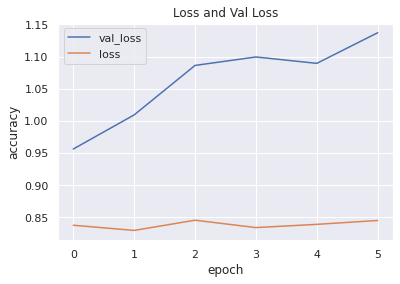

In [326]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss and Val Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

In [309]:
Tfidf_vect = TfidfVectorizer(max_features=20000)
TrainTDF = Tfidf_vect.fit_transform(rejoined_train)

In [310]:
#Splitting the data into train and test datasets
Xtrain, Xval, Ytrain, Yval = train_test_split(TrainTDF, Yt,test_size=0.3)

In [311]:
# see performance on validation 
model_naive = MultinomialNB(alpha=0.2)
model_naive.fit(Xtrain, Ytrain)

MultinomialNB(alpha=0.2)

In [312]:
y_train_pred = model_naive.predict(Xtrain)
y_pred = model_naive.predict(Xval)
  
# comparing real values with predicted values  
print("Train accuracy for Naive Bayes (in %): {}".format(metrics.accuracy_score(Ytrain, y_train_pred)*100))
print("Validation accuracy for Naive Bayes (in %): {}".format(metrics.accuracy_score(Yval, y_pred)*100))

Train accuracy for Naive Bayes (in %): 93.51190476190476
Validation accuracy for Naive Bayes (in %): 17.0


For Naive Bayes, **96% in training accuracy** and **73% in validation accuracy** is achieved using the *Tf-Idf*. The same similar result is also obtained with CountVectorizer.

In [314]:
print(classification_report(Yval, y_pred, target_names=class_names))

                 precision    recall  f1-score   support

        Mystery       0.16      0.16      0.16       603
Science Fiction       0.16      0.16      0.16       611
     NonFiction       0.15      0.15      0.15       608
            Art       0.16      0.21      0.18       568
        Fiction       0.21      0.17      0.19       620
        Romance       0.18      0.18      0.18       590

       accuracy                           0.17      3600
      macro avg       0.17      0.17      0.17      3600
   weighted avg       0.17      0.17      0.17      3600



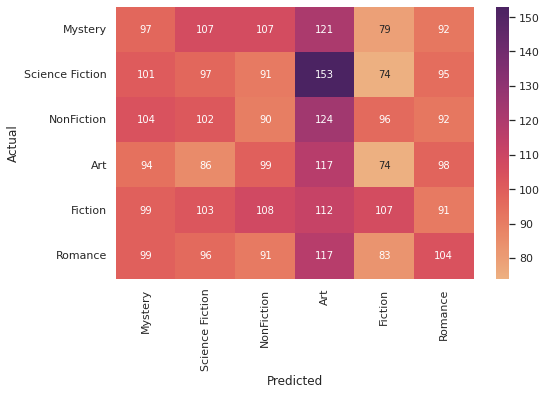

In [327]:
# confusion matrix
cm = confusion_matrix(Yval, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, xticklabels=list(set(train_df['genre'])), yticklabels=list(set(train_df['genre'])), fmt='d', annot=True, cmap=sns.color_palette("flare", as_cmap=True))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The *Science Fiction class*, as can be seen from the classification report and from the confusion matrix, is the one that assumes the lowest values of f1-score, recall and precision and that has the most difficulty in being predicted.

In the Preprocessing section we have seen a Umap plot in which the classes appears well divided. So here we will see if there are any differences in the scores using a *Umap reduction*. The best results with Umap are those related to SVM, reaching a validation accuracy of 54%. 

Even if we tried to change layers, optimizers and dropouts the validation accuracy remains *always low for LSTM (except for CounVectorizer+Umap(6 components)*. Overall, **for Naive Bayes** we get **higher scores withouth UMAP reduction** and, **for SVM the best perfomance**  are those in relation to Umap reduction, and, in particular with **Top2Vec** as we will describe in the section below.

# **Top2Vec**

The idea comes again from the observation of the UMAP plot in the "Preprocessing" section where, by recognizing the different topics, it is possible to see a situation in which the different classes seem to be distinguishable.

As Top2Vec helps us in finding topics in our corpus, in this section *we try to use Top2Vec to found words that are **semantically "similar" to some specified words (in our case, we use only the words of 'genre' classes**)*. Next, we create a new column that's a filtered version of the lemmatized_joined column with only the words that we've previously found similar to the genre classes. 

In this way, we will see if there are any difference for classification. 

In [329]:
# using an embedding model (the only one we can use in our case as the other two avaible model are integrated with foreign languages
model_train = Top2Vec(rejoined_train, embedding_model='universal-sentence-encoder')

2022-12-08 22:19:40,128 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-12-08 22:19:44,107 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-12-08 22:20:20,179 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-12-08 22:20:28,787 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-12-08 22:20:47,162 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-12-08 22:20:47,665 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [330]:
model_train.get_num_topics()

2

In [331]:
topic_words, word_scores, topic_nums = model_train.get_topics(2)
topic_words

array([['intrigue', 'novel', 'novella', 'scalzi', 'trope', 'protagonist',
        'trilogy', 'storytelling', 'cliche', 'wellwritten', 'gritty',
        'worldbuilding', 'povs', 'storyline', 'intriguing', 'plot',
        'synopsis', 'suspense', 'tale', 'prequel', 'literature',
        'heinlein', 'prose', 'suspenseful', 'agatha', 'austen', 'blurb',
        'frustrate', 'summary', 'backstory', 'chapter', 'goodreads',
        'literary', 'predictable', 'retelling', 'dickens', 'book',
        'kirkman', 'kamala', 'character', 'romance', 'write', 'epilogue',
        'compelling', 'lighthearted', 'fiction', 'dialogue',
        'postapocalyptic', 'batgirl', 'horror'],
       ['ember', 'kirkman', 'anime', 'worldbuilding', 'gon',
        'protagonist', 'trilogy', 'lost', 'chapter', 'trope', 'wind',
        'povs', 'anya', 'earth', 'element', 'sailor', 'prequel',
        'storytelling', 'saga', 'heroine', 'scalzi', 'backstory',
        'shane', 'intrigue', 'summary', 'storyline', 'series',
     

Here we take only the 500 similar words for each genre and then, for each record, from the lemmatized_text column, we check if each word is in the similar words list and, if so, we add it in the new "topic_words" column.

In [332]:
def create_topics_words(mod,lista, num_word):
    l = []
    for i in range(len(lista)):
        # the function model.similar_words returns both the words and the words scores, so we take only the first output
        l += [wo for wo in [w for w in mod.similar_words(keywords=[lista[i]], num_words=num_word)[0] if w not in l]]
    return l

In [333]:
# list containing the 500 words similar for each genre (withouth duplicates)
train_words_sim5 = create_topics_words(model_train, ['Art','Romance','Reality','Science','Mystery','Fiction'], 500)

In [334]:
def maintain_some_words(x, l):
    lists = [word for word in x if word in l]
    return lists

In [336]:
train_df['lemmatized_text'] = lemmatized_dataset['train']['lemma']+lemmatized_dataset['valid']['lemma']

In [337]:
train_df['topic_words'] = train_df['lemmatized_text'].apply(lambda x: maintain_some_words(x,train_words_sim5))

In [338]:
train_df.head()

,review_text,genre,book_id,lemmatized_joined,lemmatized_text,topic_words
0,"better than the last book, this one moves the ...",Art,12137592,honestly n't know these be get worse just lose...,"[honestly, n't, know, these, be, get, worse, j...","[honestly, know, be, just, read, the, speech, ..."
1,great art and a very solid intro into this cha...,Art,299796,this be awesome book be engross the entire tim...,"[this, be, awesome, book, be, engross, the, en...","[this, be, awesome, book, be, the, time, be, r..."
2,"stuff ended on kind of a weird note in volume,...",Art,16160800,there lot more character development here jar ...,"[there, lot, more, character, development, her...","[there, lot, character, development, here, pai..."
3,seeing batman's methods of taking down his jla...,Art,60411,helios how grow this book and hope this n't th...,"[helios, how, grow, this, book, and, hope, thi...","[how, grow, this, book, hope, this, the, last,..."
4,i won't get into the details. everybody who ma...,Art,13532252,this be very different but good way the art be...,"[this, be, very, different, but, good, way, th...","[this, be, but, way, the, art, be, phenomenal,..."


In [339]:
newtrain = train_df['topic_words'].apply(lambda x: ' '.join(x))

**By selecting 200 similar words** for each genre and using them for classification, **SVM accuracy increases to 58%**, using CountVectorizer alone. **Using instead 500 similar words** for each genre, the **SVM accuracy reaches 61%** as shown below.

In [382]:
vectorizer = CountVectorizer(min_df=2, max_features=20000)
word_doc_matrix = vectorizer.fit_transform(newtrain)

In [383]:
#Splitting the data into train and test datasets
Xtrain, Xval, Ytrain, Yval = train_test_split(word_doc_matrix,Yt,test_size=0.3)

In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=25.0, kernel='rbf', degree=3, gamma='auto')
SVM.fit(Xtrain, Ytrain)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Xval)
# Use accuracy_score function to get the accuracy
print("\nSVM Accuracy Score ----> {}".format(accuracy_score(predictions_SVM, Yval)*100))

In [ ]:
print(classification_report(Yval, predictions_SVM, target_names=list(set(train_df['genre']))))

In [ ]:
cm = confusion_matrix(Yval, predictions_SVM)
plt.figure(figsize=(8,5))
sns.heatmap(cm, xticklabels=list(set(train_df['genre'])), yticklabels=list(set(train_df['genre'])), fmt='d', annot=True, cmap=sns.color_palette("light:b", as_cmap=True))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In this case, the class that seems to be predicted the better is "*Mistery*" and, conversely, the class predicted the worse is "*Science Fiction"*, as seen also before.

# **Test set**

To see the perfomance of **test set**, in this case we choose only the models that give us better results: *Naive Bayes Classifier* and *SVM*. The test set score for Naive Bayes, taking into account only the Tf-idf case, is not so good as we expected:

In [354]:
new_test = test_df['lemmatized_joined']

In [350]:
Tfidf_vect = TfidfVectorizer(max_features=20000)
TrainTDF = Tfidf_vect.fit_transform(rejoined_train)
TestTDF = Tfidf_vect.transform(new_test)

In [351]:
# see performance on validation 
model_naive = MultinomialNB(alpha=0.2)
model_naive.fit(TrainTDF, Yt)

MultinomialNB(alpha=0.2)

In [352]:
y_train_pred = model_naive.predict(TrainTDF)
y_pred = model_naive.predict(TestTDF)
  
# comparing real values with predicted values  
print("Train accuracy for Naive Bayes (in %): {}".format(metrics.accuracy_score(Yt, y_train_pred)*100))
print("Test accuracy for Naive Bayes (in %): {}".format(metrics.accuracy_score(Ytest, y_pred)*100))

Train accuracy for Naive Bayes (in %): 89.31666666666666
Test accuracy for Naive Bayes (in %): 16.08090008036432


In [355]:
len(new_test)

37330

For *SVM*, using CountVectorizer + Umap and as input the "Topic words" filtered column with Top2Vec, we obtained the following score:

In [358]:
model_test = Top2Vec(new_test.to_numpy(), embedding_model='universal-sentence-encoder')

2022-12-08 22:30:26,449 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-12-08 22:30:38,932 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-12-08 22:30:43,176 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-12-08 22:31:13,212 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-12-08 22:31:44,152 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-12-08 22:31:49,055 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [363]:
test_df['lemmatized_text'] = test_df['lemmatized_joined'].apply(lambda x: x.split())
test_df.head()

,text,label,book_id,lemmatized_joined,lemmatized_text
299005,i love how wide reaching these books are with ...,Fiction,4588949,love how wide reach these book be with all the...,"[love, how, wide, reach, these, book, be, with..."
5876,what a beautiful story. i'm always excited to ...,Romance,10629679,what beautiful story always excite read new bo...,"[what, beautiful, story, always, excite, read,..."
340857,this was pretty intense and thoughtprovoking e...,Romance,25387181,this be pretty intense and thoughtprovoking ex...,"[this, be, pretty, intense, and, thoughtprovok..."
169150,"ack! i loved the cinderella aspect to this, an...",Romance,9408584,ack love the cinderella aspect this and also h...,"[ack, love, the, cinderella, aspect, this, and..."
136867,the book ends with a happy middle. not a happy...,Fiction,13618440,the book end with happy middle not happy end o...,"[the, book, end, with, happy, middle, not, hap..."


In [364]:
# list containing the 500 words similar for each genre (withouth duplicates)
test_words_sim5 = create_topics_words(model_test, ['Art','Romance','Reality','Science','Mystery','Fiction'], 1000)

In [365]:
test_df['topic_words'] = test_df['lemmatized_text'].apply(lambda x: maintain_some_words(x, test_words_sim5))

In [366]:
newtest = test_df['topic_words'].apply(lambda x: ' '.join(x))

In [367]:
vectorizer = CountVectorizer(min_df=2, max_features=20000)
word_doc_matrix = vectorizer.fit_transform(newtrain)
word_doc_matrix_test = vectorizer.fit_transform(newtest)

In [368]:
embedding_train = umap_reduction(word_doc_matrix)
embedding_test = umap_reduction(word_doc_matrix_test)

In [374]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=0.01, kernel='rbf', degree=3, gamma='auto')
SVM.fit(embedding_train,Yt)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(embedding_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> {}".format(accuracy_score(predictions_SVM, Ytest)*100))

SVM Accuracy Score -> 57.037235467452454


# **Conclusions**

In general, the best results we get are the following:

*   For **Naive Bayes**, using only CountVectorizer or Tf-Idf, we get roughly a **94% of accuracy in training set and 73% in validation set**.
*   For **SVM**, the best case is obtained with the new column reduced with the most semantically most similar words and using CountVectorizer (reaching a **61% of validation accuracy**). But, in general, in the previous cases it was possible to see a good improvement in accuracy using the Umap Reduction, in particular with a reduction of 6 components (even for 2 components but not so much compared to the latter.
*   For **LSTM**, we didn't find a lower validation loss and, using a Patience parameter, decided to stop using a 3/5 value of Patience. In the analyzed cases, the best case is obtained with CountVectorizer + Umap (**40%**).
*  For Test Set, we took only the models in which we obtained a higher validation accuracy, but obtaining lower scores. 